<a href="https://colab.research.google.com/github/manishsrinivasan/INSE6220/blob/main/ParkinsonsProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Principal Component Analysis of Parkinson's Disease Dataset

In [1]:
!pip install pycaret==3.0.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.8/481.8 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 22.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.6/172.6 kB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.7/20.7 MB 37.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 44.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 44.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 54.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 16.5 MB/

In [2]:
from pycaret.utils import version
version()

'3.0.0'

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [4]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.5.3
Seaborn version:  0.12.2


DATASET:

The “Parkinson's Disease Data Set” used for Principle Component Analysis (PCA) and classification models is obtained from Kaggle. The data set provided information about diagnosis of Parkinson's using Multidimensional Voice Program (MDVP).

There are 9 attributes with 196 entries.

All attributes are numerical and they are listed bellow:

MDVP:Fo(Hz) - Average vocal fundamental frequency

MDVP:Fhi(Hz) - Maximum vocal fundamental frequency

MDVP:Flo(Hz) - Minimum vocal fundamental frequency

MDVP:Jitter(%)

MDVP:Jitter(Abs)

MDVP:RAP

MDVP:PPQ

Jitter:DDP - Several

Status - Health status of the subject: (one) - Parkinson's, (zero) - healthy

The original dataset can be found on below link: https://www.kaggle.com/datasets/debasisdotcom/parkinson-disease-detection

In [8]:
import pandas as pd

url = 'https://raw.githubusercontent.com/manishsrinivasan/INSE6220ParkinsonsProject/main/Parkinsson%20disease.csv'
df = pd.read_csv(url)
df.head(25)


MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  MDVP:Jitter(Abs)  \
0       119.992       157.302        74.997         0.00784           0.00007   
1       122.400       148.650       113.819         0.00968           0.00008   
2       116.682       131.111       111.555         0.01050           0.00009   
3       116.676       137.871       111.366         0.00997           0.00009   
4       116.014       141.781       110.655         0.01284           0.00011   
5       120.552       131.162       113.787         0.00968           0.00008   
6       120.267       137.244       114.820         0.00333           0.00003   
7       107.332       113.840       104.315         0.00290           0.00003   
8        95.730       132.068        91.754         0.00551           0.00006   
9        95.056       120.103        91.226         0.00532           0.00006   
10       88.333       112.240        84.072         0.00505           0.00006   
11       91.904       115.871        86.292         0.00540           0.00006   
12      136.926       159.866       131.276         0.00293           0.00002   
13      139.173       179.139        76.556         0.00390           0.00003   
14      152.845       163.305        75.836         0.00294           0.00002   
15      142.167       217.455        83.159         0.00369           0.00003   
16      144.188       349.259        82.764         0.00544           0.00004   
17      168.778       232.181        75.603         0.00718           0.00004   
18      153.046       175.829        68.623         0.00742           0.00005   
19      156.405       189.398       142.822         0.00768           0.00005   
20      153.848       165.738        65.782         0.00840           0.00005   
21      153.880       172.860        78.128         0.00480           0.00003   
22      167.930       193.221        79.068         0.00442           0.00003   
23      173.917       192.735        86.180         0.00476           0.00003   
24      163.656       200.841        76.779         0.00742           0.00005   

    MDVP:RAP  MDVP:PPQ  Jitter:DDP  status  
0    0.00370   0.00554     0.01109       1  
1    0.00465   0.00696     0.01394       1  
2    0.00544   0.00781     0.01633       1  
3    0.00502   0.00698     0.01505       1  
4    0.00655   0.00908     0.01966       1  
5    0.00463   0.00750     0.01388       1  
6    0.00155   0.00202     0.00466       1  
7    0.00144   0.00182     0.00431       1  
8    0.00293   0.00332     0.00880       1  
9    0.00268   0.00332     0.00803       1  
10   0.00254   0.00330     0.00763       1  
11   0.00281   0.00336     0.00844       1  
12   0.00118   0.00153     0.00355       1  
13   0.00165   0.00208     0.00496       1  
14   0.00121   0.00149     0.00364       1  
15   0.00157   0.00203     0.00471       1  
16   0.00211   0.00292     0.00632       1  
17   0.00284   0.00387     0.00853       1  
18   0.00364   0.00432     0.01092       1  
19   0.00372   0.00399     0.01116       1  
20   0.00428   0.00450     0.01285       1  
21   0.00232   0.00267     0.00696       1  
22   0.00220   0.00247     0.00661       1  
23   0.00221   0.00258     0.00663       1  
24   0.00380   0.00390     0.01140       1

In [9]:
len(df.index)

195

In [10]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [11]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


Exploratory Data Analysis

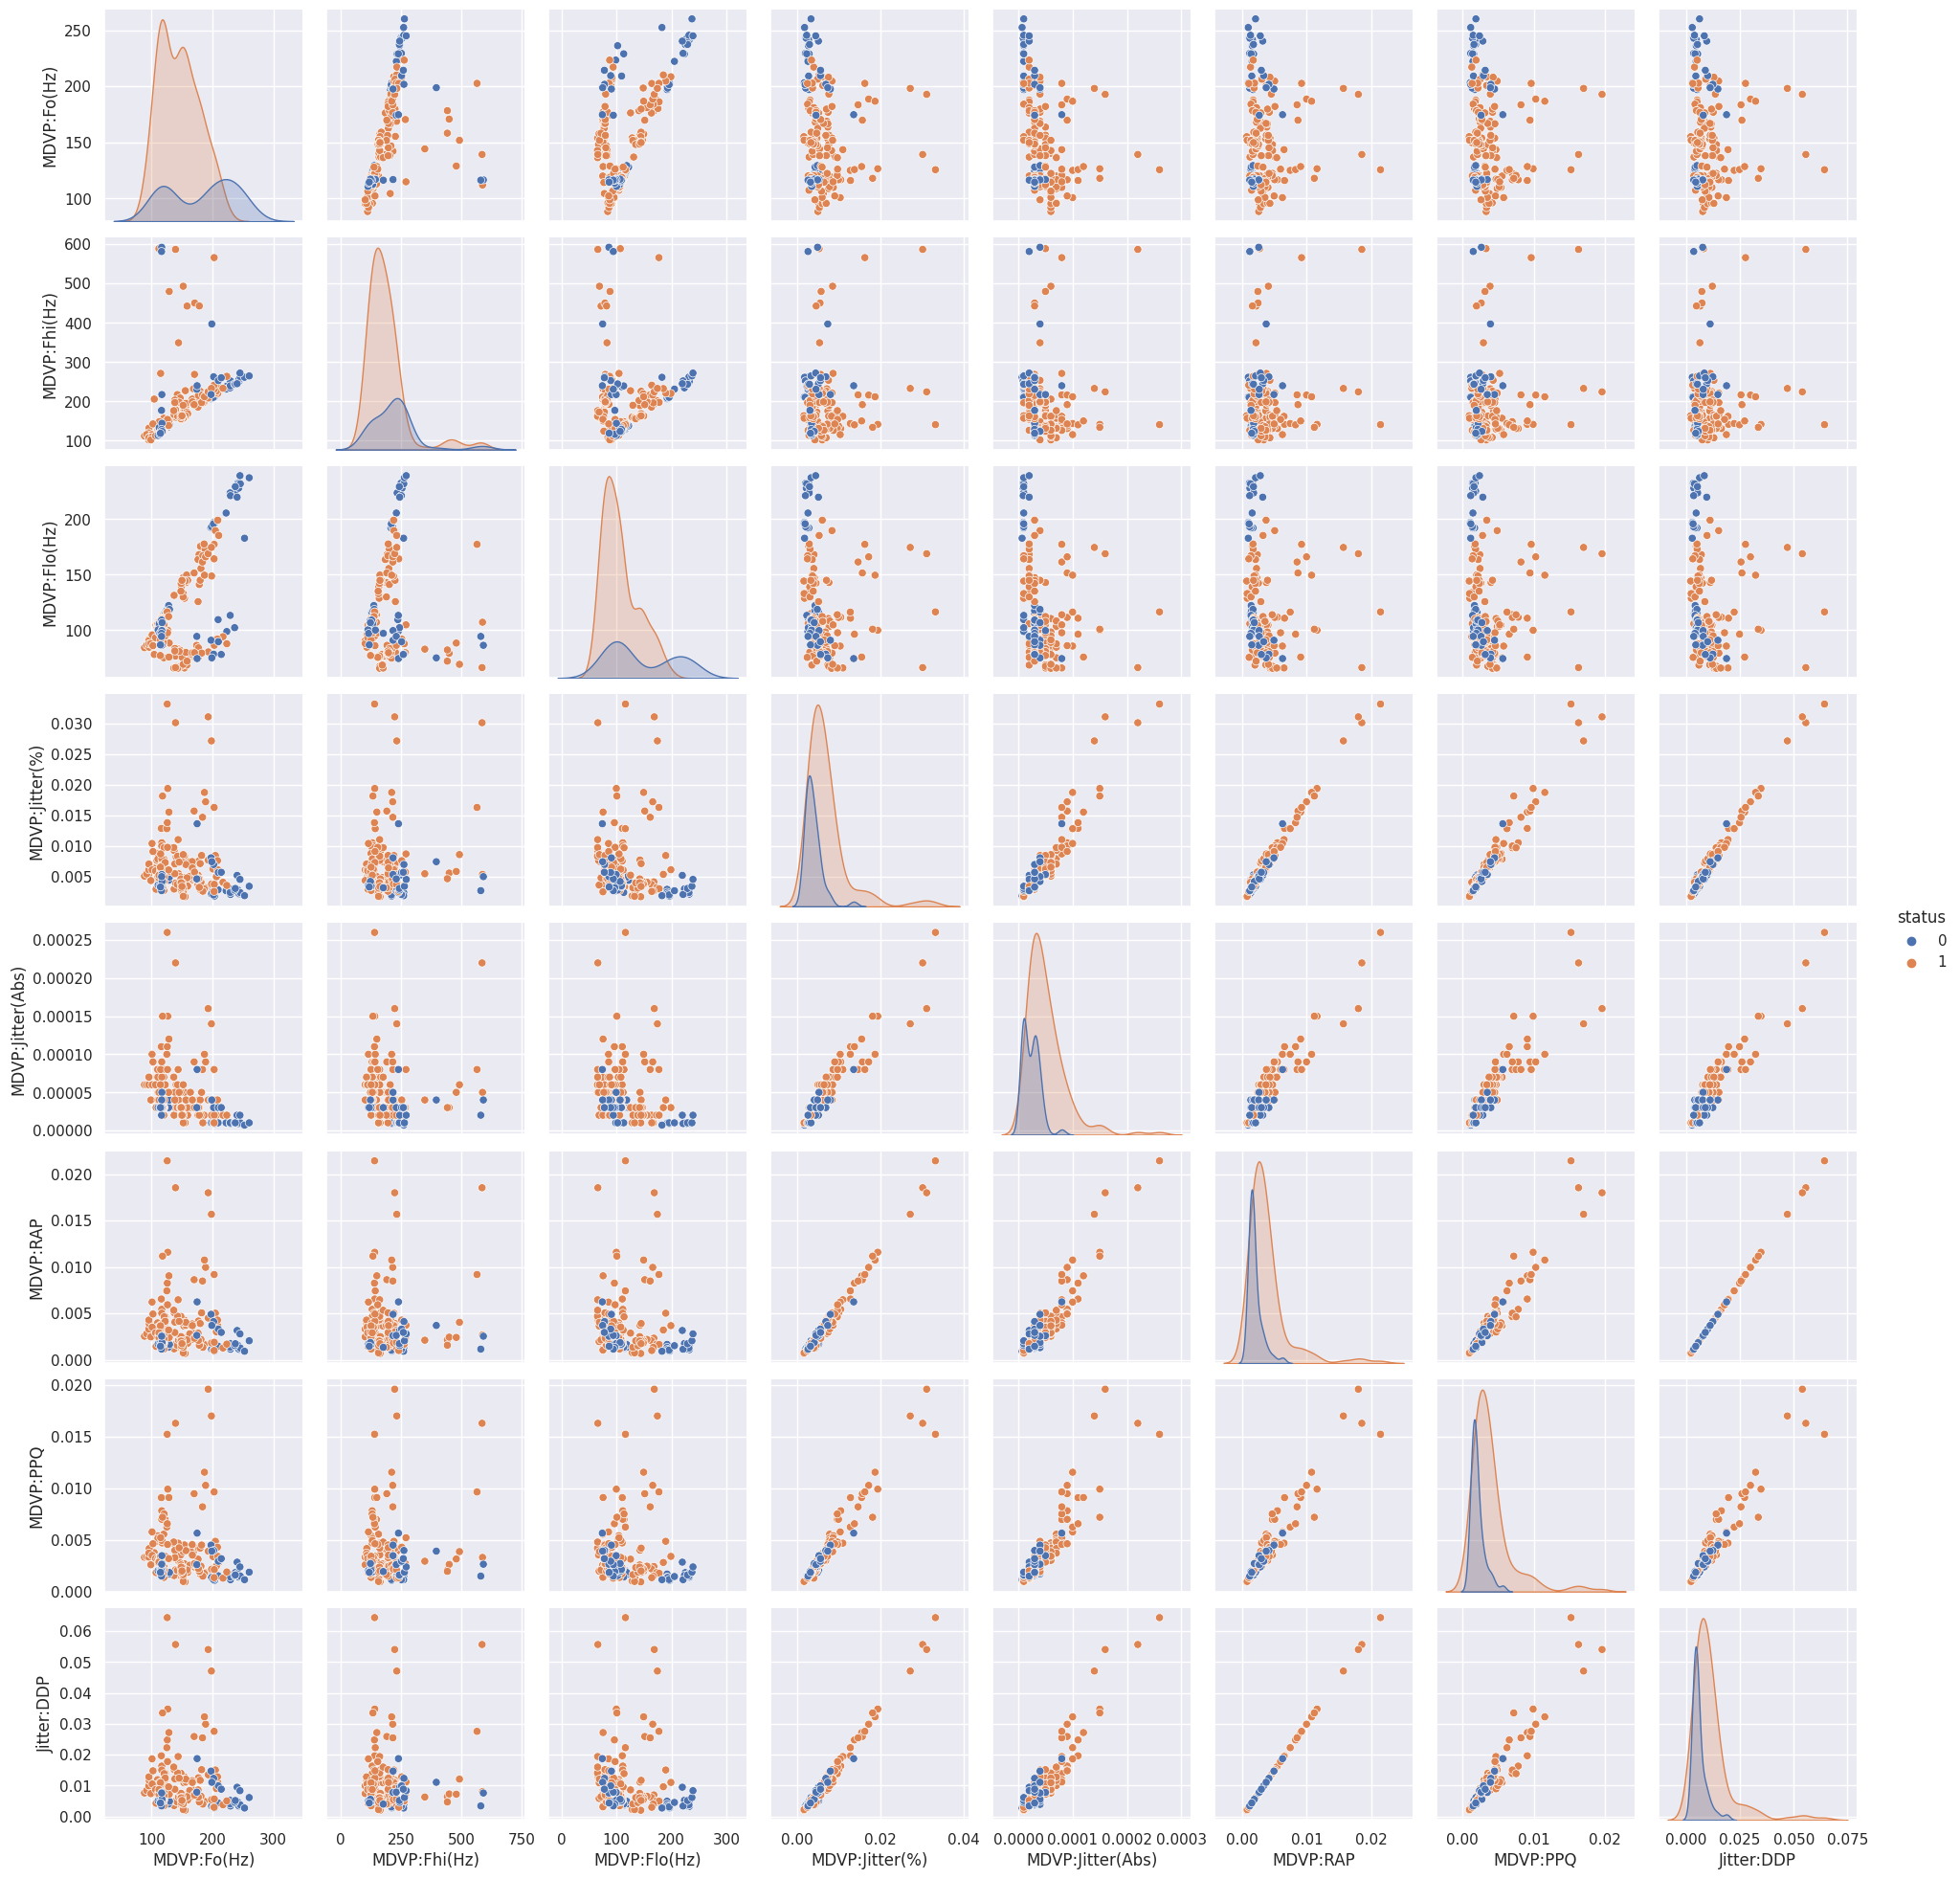

In [13]:
sns.pairplot(df, hue='status')
plt.show()

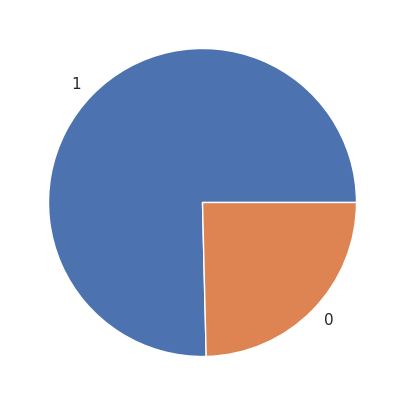

In [15]:
y =df['status']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

Data Matrix

In [17]:
X = df.drop(columns=['status'])
X.head(10)

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  MDVP:Jitter(Abs)  \
0      119.992       157.302        74.997         0.00784           0.00007   
1      122.400       148.650       113.819         0.00968           0.00008   
2      116.682       131.111       111.555         0.01050           0.00009   
3      116.676       137.871       111.366         0.00997           0.00009   
4      116.014       141.781       110.655         0.01284           0.00011   
5      120.552       131.162       113.787         0.00968           0.00008   
6      120.267       137.244       114.820         0.00333           0.00003   
7      107.332       113.840       104.315         0.00290           0.00003   
8       95.730       132.068        91.754         0.00551           0.00006   
9       95.056       120.103        91.226         0.00532           0.00006   

   MDVP:RAP  MDVP:PPQ  Jitter:DDP  
0   0.00370   0.00554     0.01109  
1   0.00465   0.00696     0.01394  
2   0.00544   0.00781     0.01633  
3   0.00502   0.00698     0.01505  
4   0.00655   0.00908     0.01966  
5   0.00463   0.00750     0.01388  
6   0.00155   0.00202     0.00466  
7   0.00144   0.00182     0.00431  
8   0.00293   0.00332     0.00880  
9   0.00268   0.00332     0.00803

In [18]:
X.describe().transpose()

count        mean        std         min         25%  \
MDVP:Fo(Hz)       195.0  154.228641  41.390065   88.333000  117.572000   
MDVP:Fhi(Hz)      195.0  197.104918  91.491548  102.145000  134.862500   
MDVP:Flo(Hz)      195.0  116.324631  43.521413   65.476000   84.291000   
MDVP:Jitter(%)    195.0    0.006220   0.004848    0.001680    0.003460   
MDVP:Jitter(Abs)  195.0    0.000044   0.000035    0.000007    0.000020   
MDVP:RAP          195.0    0.003306   0.002968    0.000680    0.001660   
MDVP:PPQ          195.0    0.003446   0.002759    0.000920    0.001860   
Jitter:DDP        195.0    0.009920   0.008903    0.002040    0.004985   

                        50%         75%        max  
MDVP:Fo(Hz)       148.79000  182.769000  260.10500  
MDVP:Fhi(Hz)      175.82900  224.205500  592.03000  
MDVP:Flo(Hz)      104.31500  140.018500  239.17000  
MDVP:Jitter(%)      0.00494    0.007365    0.03316  
MDVP:Jitter(Abs)    0.00003    0.000060    0.00026  
MDVP:RAP            0.00250    0.003835    0.02144  
MDVP:PPQ            0.00269    0.003955    0.01958  
Jitter:DDP          0.00749    0.011505    0.06433

Standardize the data

In [19]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  MDVP:Jitter(Abs)  \
0    -0.829300     -0.436165     -0.952037        0.334914          0.749759   
1    -0.770972     -0.530974     -0.057721        0.715418          1.037674   
2    -0.909476     -0.723168     -0.109875        0.884991          1.325589   
3    -0.909622     -0.649092     -0.114229        0.775389          1.325589   
4    -0.925657     -0.606245     -0.130608        1.368893          1.901418   
5    -0.815735     -0.722609     -0.058458        0.715418          1.037674   
6    -0.822638     -0.655962     -0.034661       -0.597735         -0.401899   
7    -1.135957     -0.912426     -0.276658       -0.686658         -0.401899   
8    -1.416988     -0.712681     -0.566017       -0.146921          0.461845   
9    -1.433314     -0.843795     -0.578181       -0.186212          0.461845   

   MDVP:RAP  MDVP:PPQ  Jitter:DDP  
0  0.132963  0.760800    0.131755  
1  0.453892  1.276809    0.452684  
2  0.720770  1.585687    0.721813  
3  0.578885  1.284076    0.577677  
4  1.095750  2.047187    1.096793  
5  0.447135  1.473037    0.445927  
6 -0.593351 -0.518319   -0.592304  
7 -0.630511 -0.590996   -0.631716  
8 -0.127159 -0.045917   -0.126113  
9 -0.211614 -0.045917   -0.212820

In [20]:
X.describe().transpose()

count          mean       std       min       25%       50%  \
MDVP:Fo(Hz)       195.0  2.960595e-17  1.002574 -1.596162 -0.887918 -0.131738   
MDVP:Fhi(Hz)      195.0 -2.277381e-16  1.002574 -1.040581 -0.682059 -0.233144   
MDVP:Flo(Hz)      195.0  1.047595e-16  1.002574 -1.171366 -0.737938 -0.276658   
MDVP:Jitter(%)    195.0  1.821904e-17  1.002574 -0.938949 -0.570852 -0.264794   
MDVP:Jitter(Abs)  195.0  9.109522e-17  1.002574 -1.064103 -0.689814 -0.401899   
MDVP:RAP          195.0 -1.275333e-16  1.002574 -0.887254 -0.556191 -0.272422   
MDVP:PPQ          195.0  6.376666e-17  1.002574 -0.918044 -0.576461 -0.274850   
Jitter:DDP        195.0  7.287618e-17  1.002574 -0.887333 -0.555707 -0.273628   

                       75%       max  
MDVP:Fo(Hz)       0.691321  2.564598  
MDVP:Fhi(Hz)      0.296971  4.327631  
MDVP:Flo(Hz)      0.545820  2.829908  
MDVP:Jitter(%)    0.236686  5.570985  
MDVP:Jitter(Abs)  0.461845  6.220139  
MDVP:RAP          0.178568  6.125892  
MDVP:PPQ          0.184833  5.862742  
Jitter:DDP        0.178487  6.126923

Observations and Variables

In [21]:
observations = list(df.index)
variables = list(df.columns)

Box and Whisker Plots

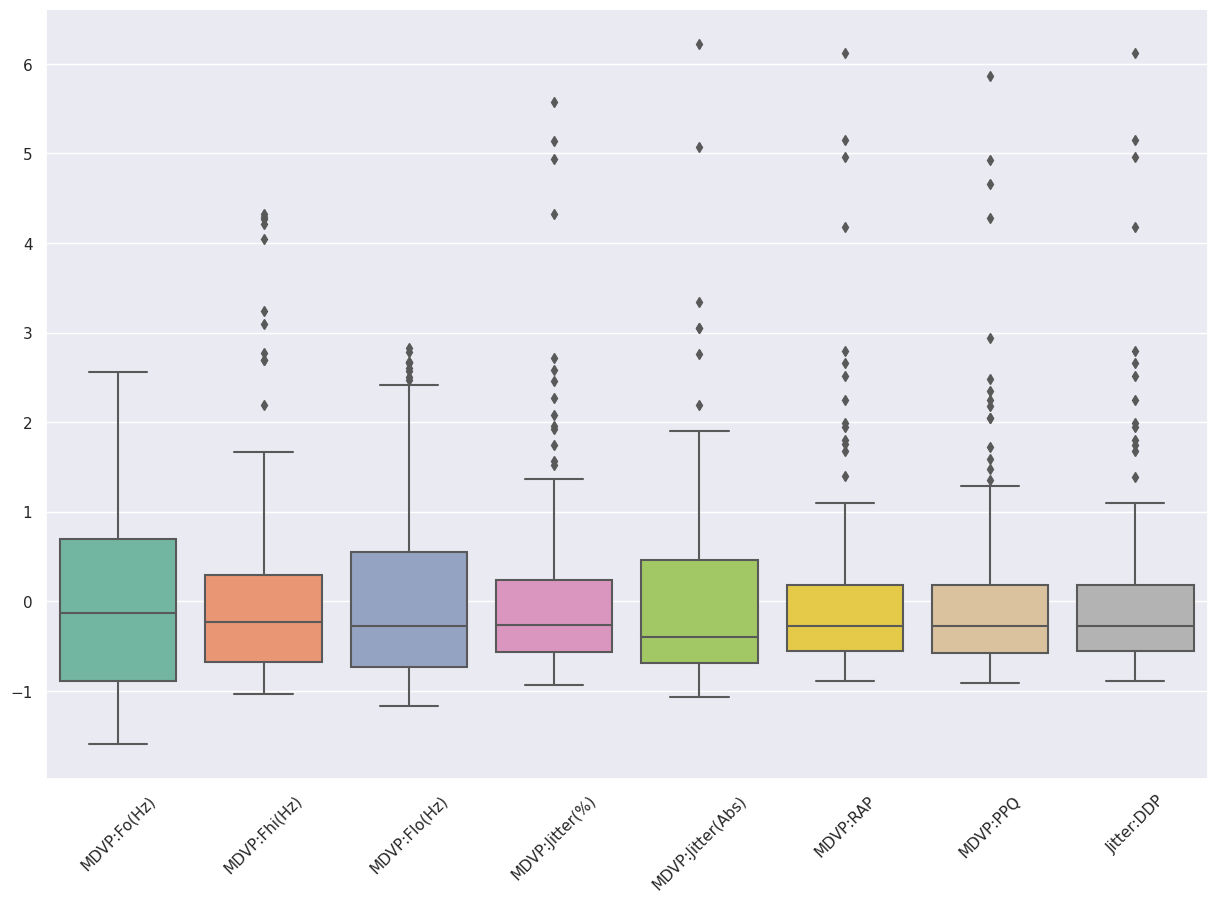

In [22]:
ax = plt.figure(figsize=(15,10))
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

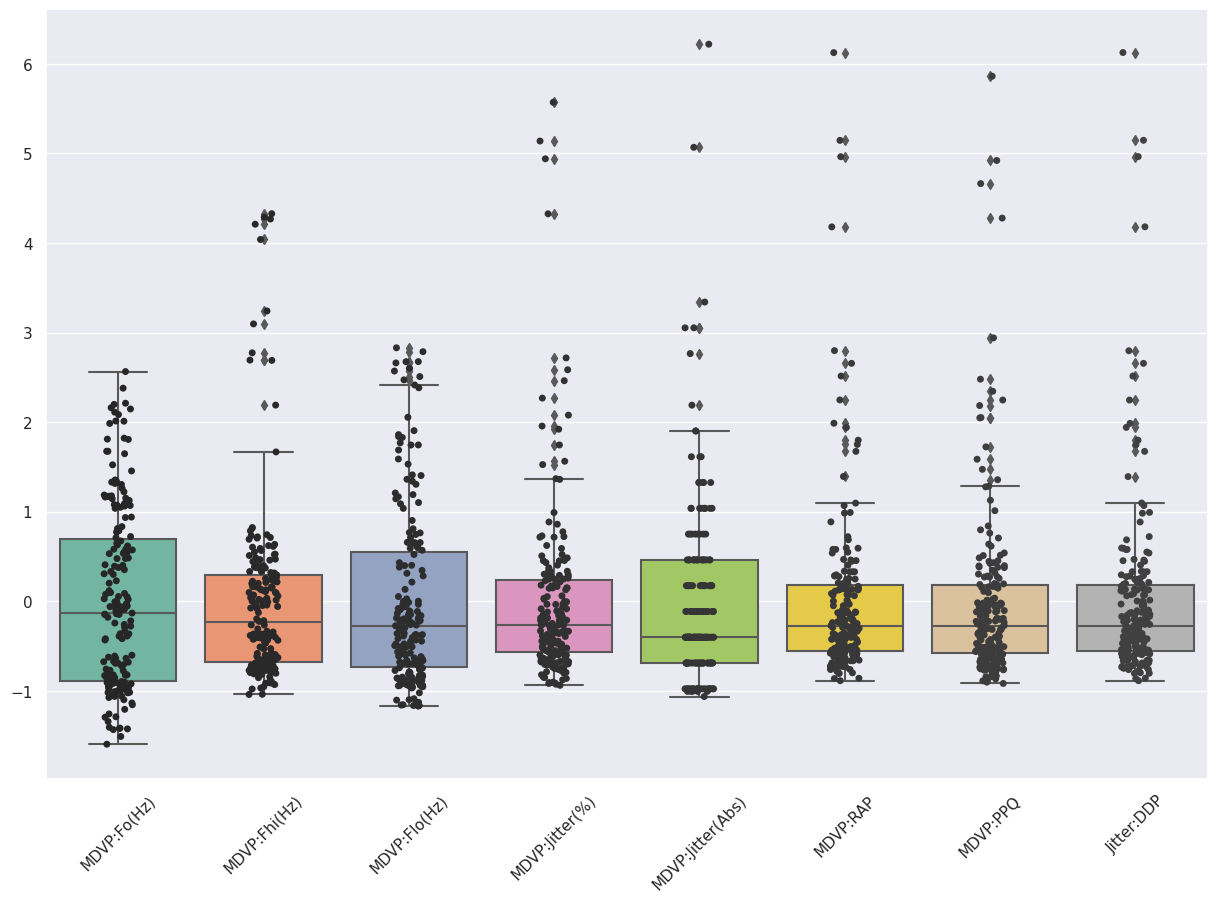

In [23]:
ax = plt.figure(figsize=(15,10))
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

Correlation Matrix

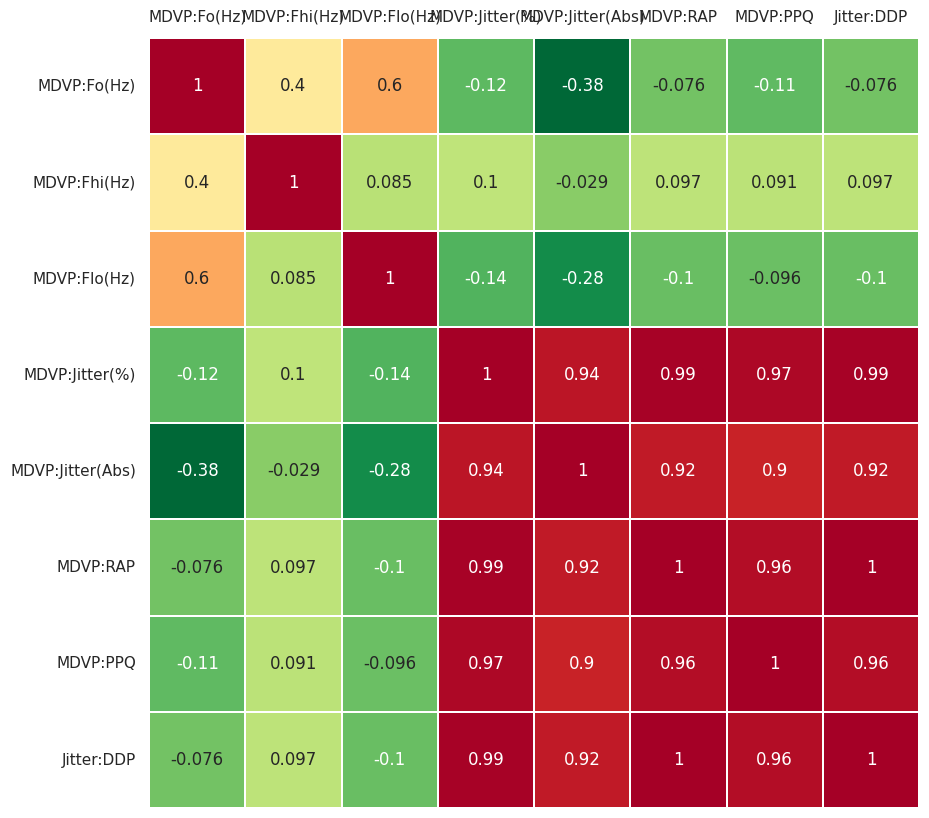

In [24]:
fig1,ax1 = plt.subplots(figsize=(15,10))
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.3, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

PRINCIPAL COMPONENT ANALYSIS

Text(0, 0.5, 'Z2')

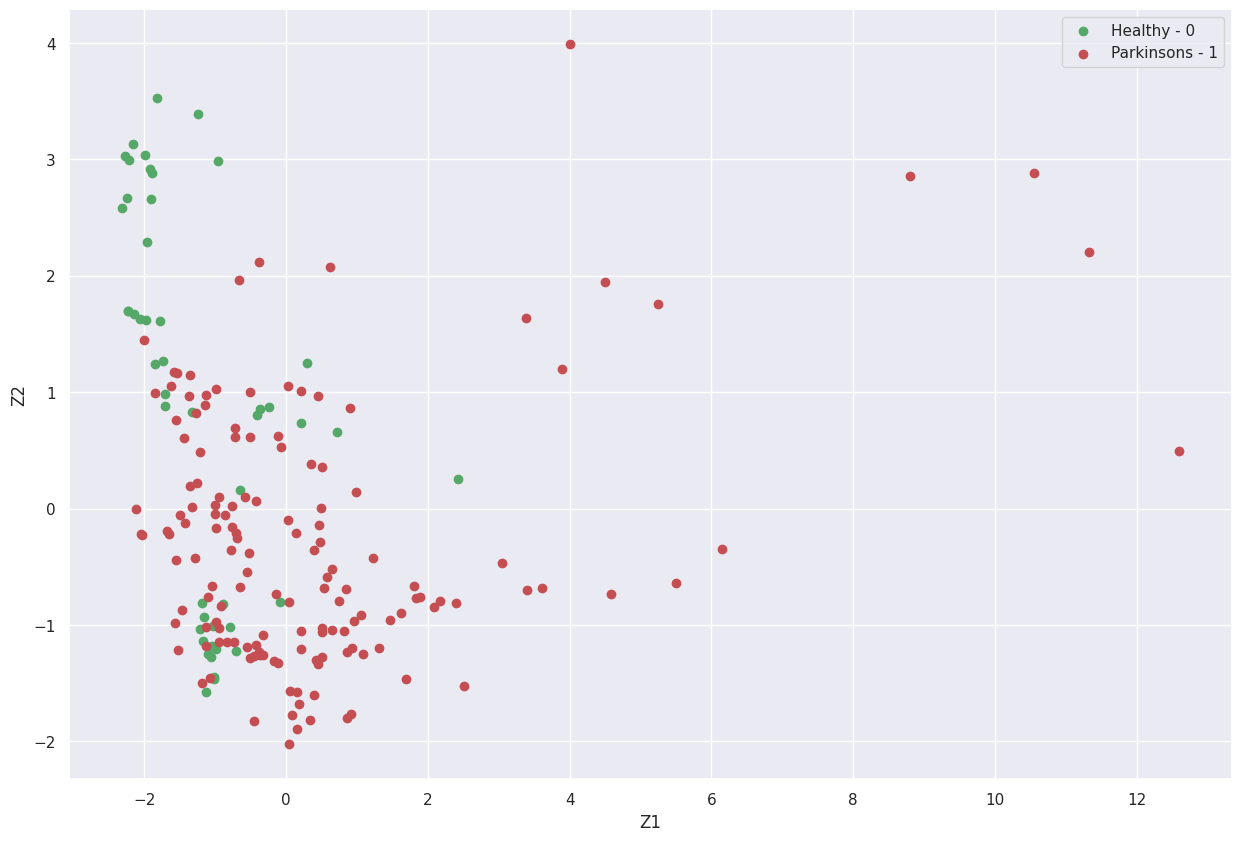

In [26]:
pca = PCA()
Z = pca.fit_transform(X)


idx_0= np.where(y == 0)
idx_1 = np.where(y == 1)


plt. figure(figsize=(15,10))
plt.scatter(Z[idx_0,0], Z[idx_0,1], c='g', label='Healthy - 0')
plt.scatter(Z[idx_1,0], Z[idx_1,1], c='r', label='Parkinsons - 1')


plt.legend()
plt.xlabel('Z1')
plt.ylabel('Z2')

Eigenvectors

array([[-9.82615106e-02,  6.67771285e-01, -5.26206803e-02,
        -6.80056673e-01,  1.07282372e-01,  2.59174487e-01,
        -2.23438346e-02, -5.74443771e-05],
       [ 2.87897660e-02,  4.50427189e-01,  8.11317357e-01,
         3.70716302e-01,  1.06097277e-02, -1.77538172e-02,
        -1.38672802e-02, -9.90635712e-06],
       [-9.55671373e-02,  5.51795934e-01, -5.75057112e-01,
         5.94569300e-01,  2.87186595e-02, -2.40762075e-02,
         2.79357857e-02,  4.96940446e-05],
       [ 4.48658012e-01,  7.22232102e-02, -1.73049575e-02,
        -5.24822933e-02, -6.19965118e-02, -5.52325659e-02,
         8.85178920e-01,  1.40197741e-04],
       [ 4.36606384e-01, -1.20622940e-01, -2.05426767e-02,
         1.72887391e-01,  4.94729855e-01,  7.10435085e-01,
        -1.22626566e-01, -7.36243814e-05],
       [ 4.45236299e-01,  9.95952907e-02, -4.91339191e-02,
        -8.34617890e-02,  2.02172380e-01, -4.22035618e-01,
        -2.51991667e-01,  7.07091133e-01],
       [ 4.38169869e-01,  8.434679

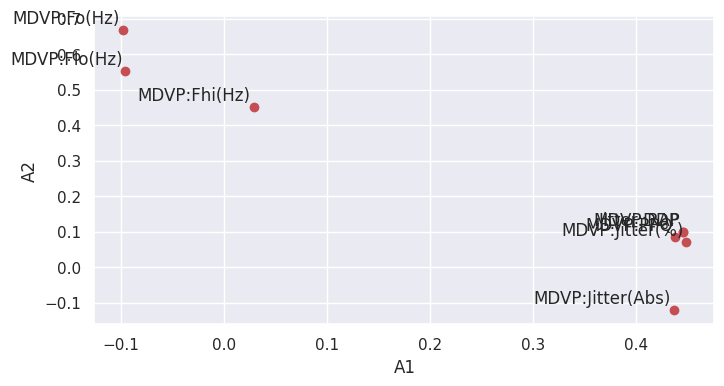

In [27]:
A = pca.components_.T
plt. figure(figsize=(8,4))

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('A1')
plt.ylabel('A2')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')
A

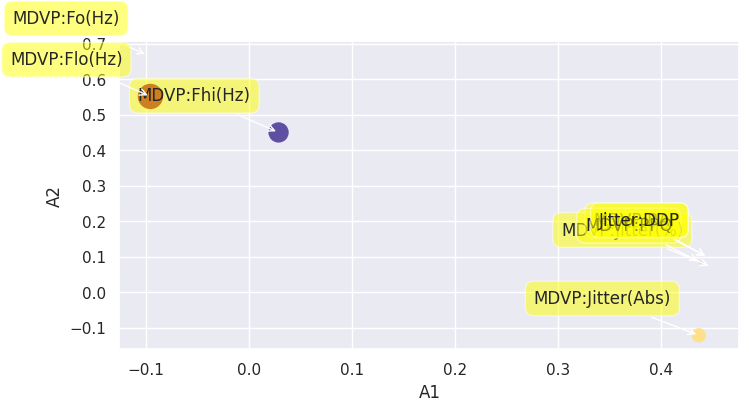

In [28]:
plt. figure(figsize=(8,4))
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('A1')
plt.ylabel('A2')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

Scree Plot and Eigen Vectors

array([4.91491098e+00, 1.79194999e+00, 8.99289104e-01, 3.31505892e-01,
       6.65784657e-02, 3.07060524e-02, 6.29623580e-03, 3.99989696e-07])

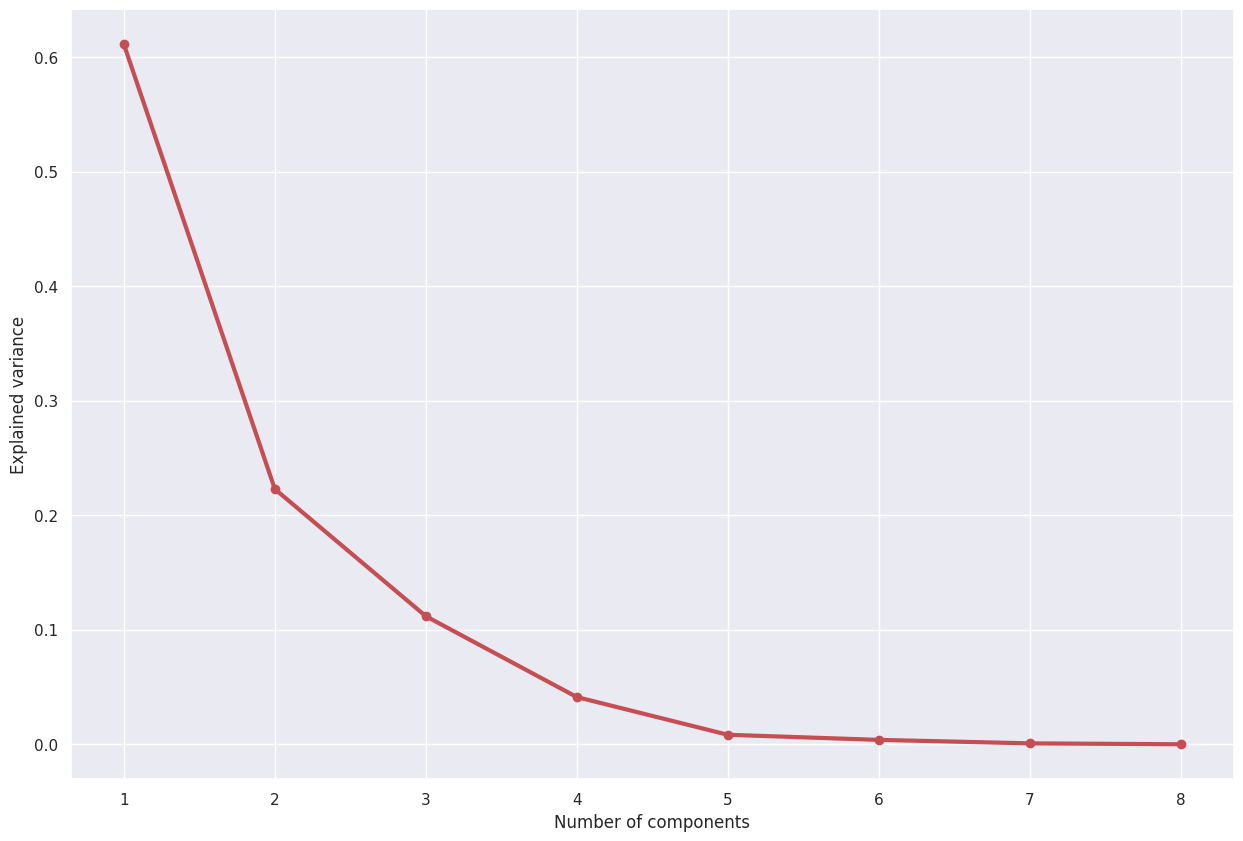

In [29]:
#Eigenvalues
Lambda = pca.explained_variance_

#Scree plot
x = np.arange(len(Lambda)) + 1
plt. figure(figsize=(15,10))
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
Lambda

Experienced Variance

Text(0, 0.5, 'Cumulative explained variance')

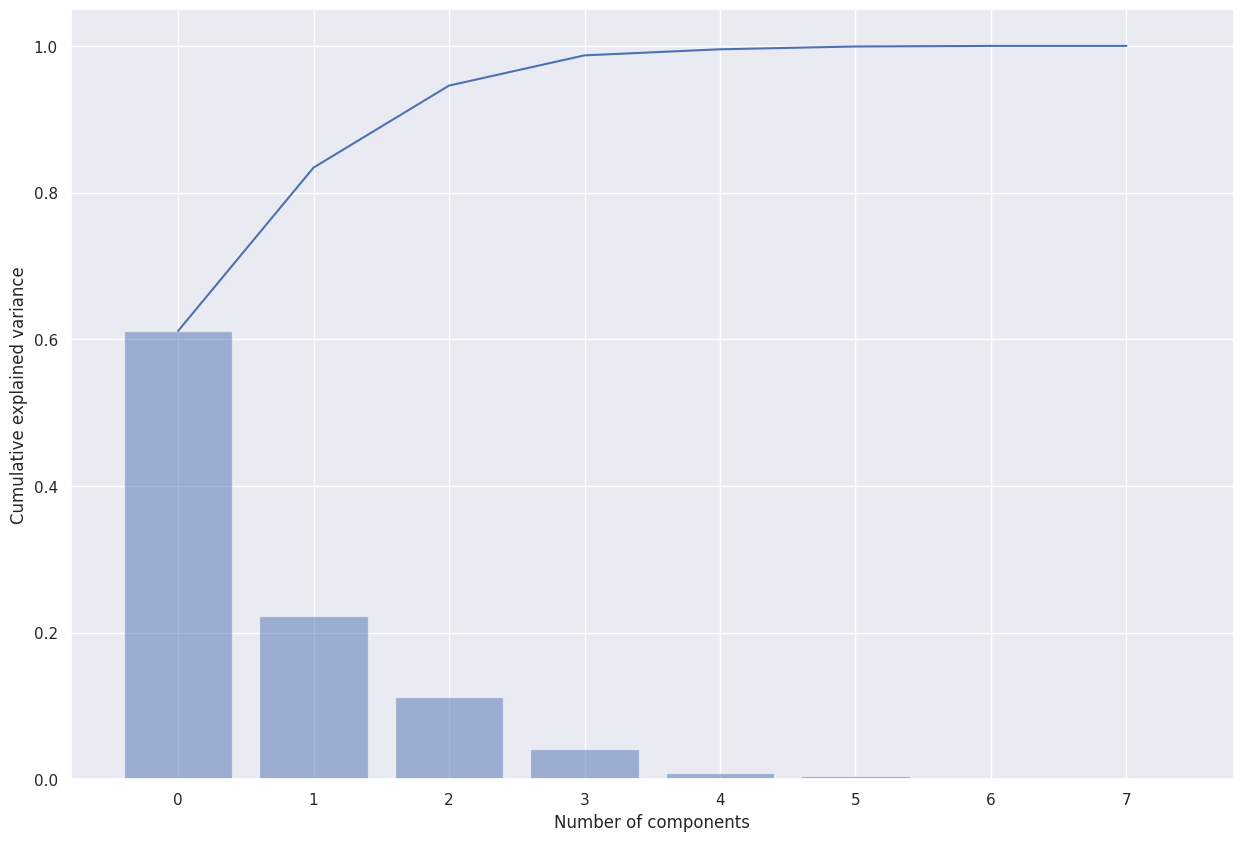

In [30]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt. figure(figsize=(15,10))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

Biplot

array([-1.25128764e+00, -6.61361882e-01, -8.12245783e-01, -8.43220489e-01,
       -7.02717934e-01, -7.62772610e-01, -1.02041736e+00, -1.49887219e+00,
       -1.67497826e+00, -1.77153340e+00, -2.02386812e+00, -1.89473098e+00,
       -4.41280036e-01, -9.77129848e-01, -8.70589325e-01, -6.65811421e-01,
        6.73303359e-02, -9.93749070e-02, -6.84344045e-01,  3.79284258e-01,
       -6.93960961e-01, -6.73754594e-01, -3.53814900e-01, -1.59959614e-01,
       -2.87703950e-01, -1.30426188e+00, -2.56312278e-01, -5.47924779e-01,
       -4.24023074e-01, -3.82355026e-01,  1.60728625e+00,  1.61756820e+00,
        1.62548510e+00,  1.69759823e+00,  1.70067225e+00,  1.67181237e+00,
        9.73201723e-01,  8.20775183e-01,  1.05057727e+00,  1.16651135e+00,
        1.16974931e+00,  9.94277086e-01,  2.88558880e+00,  3.03936097e+00,
        3.03157182e+00,  2.99304062e+00,  3.12841406e+00,  2.58291376e+00,
       -1.01653123e+00, -1.03521338e+00, -9.35305842e-01, -1.00694236e+00,
       -8.06921040e-01, -

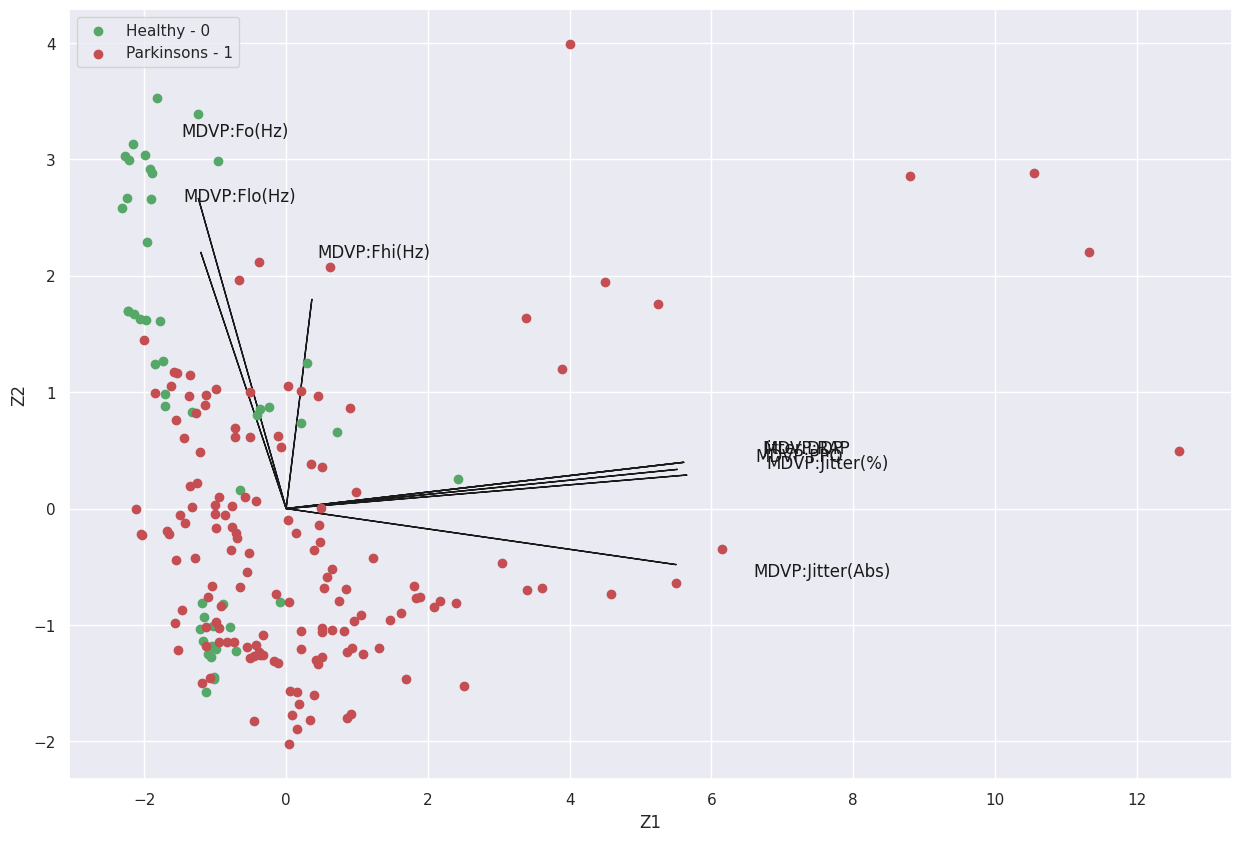

In [32]:
A1 = A[:,0]
A2 = A[:,1]
Z1 = Z[:,0]
Z2 = Z[:,1]

plt. figure(figsize=(15,10))
plt.xlabel('Z1')
plt.ylabel('Z2')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_0,0], Z[idx_0,1], c='g', label='Healthy - 0')
plt.scatter(Z[idx_1,0], Z[idx_1,1], c='r', label='Parkinsons - 1')

plt.legend(loc='upper left')
Z1
Z2

Using PCA Library

In [33]:
!pip install pca

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 2.3 MB/s eta 0:00:00


In [34]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [8] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [4] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [8] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[4]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


Principal Components

In [35]:
out['PC']

PC1       PC2       PC3       PC4
0    1.088748 -1.251288  0.163136 -0.070898
1    1.803119 -0.661362 -0.502249  0.364256
2    2.391956 -0.812246 -0.672296  0.353531
3    2.085842 -0.843220 -0.577911  0.406961
4    3.403536 -0.702718 -0.645932  0.408910
..        ...       ...       ...       ...
190 -0.654359  0.162046  0.620814 -0.508319
191 -0.366463  0.853145  0.802321 -1.115378
192  2.427346  0.258114  0.725195 -0.801606
193  0.298003  1.251943  2.245226 -0.543021
194 -0.416389  0.803586  1.020464 -1.301819

[195 rows x 4 columns]

Scatter Plot

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '4 Principal Components explain [99.53%] of the variance'}, xlabel='PC1 (61.1% expl.var)', ylabel='PC2 (22.2% expl.var)'>)

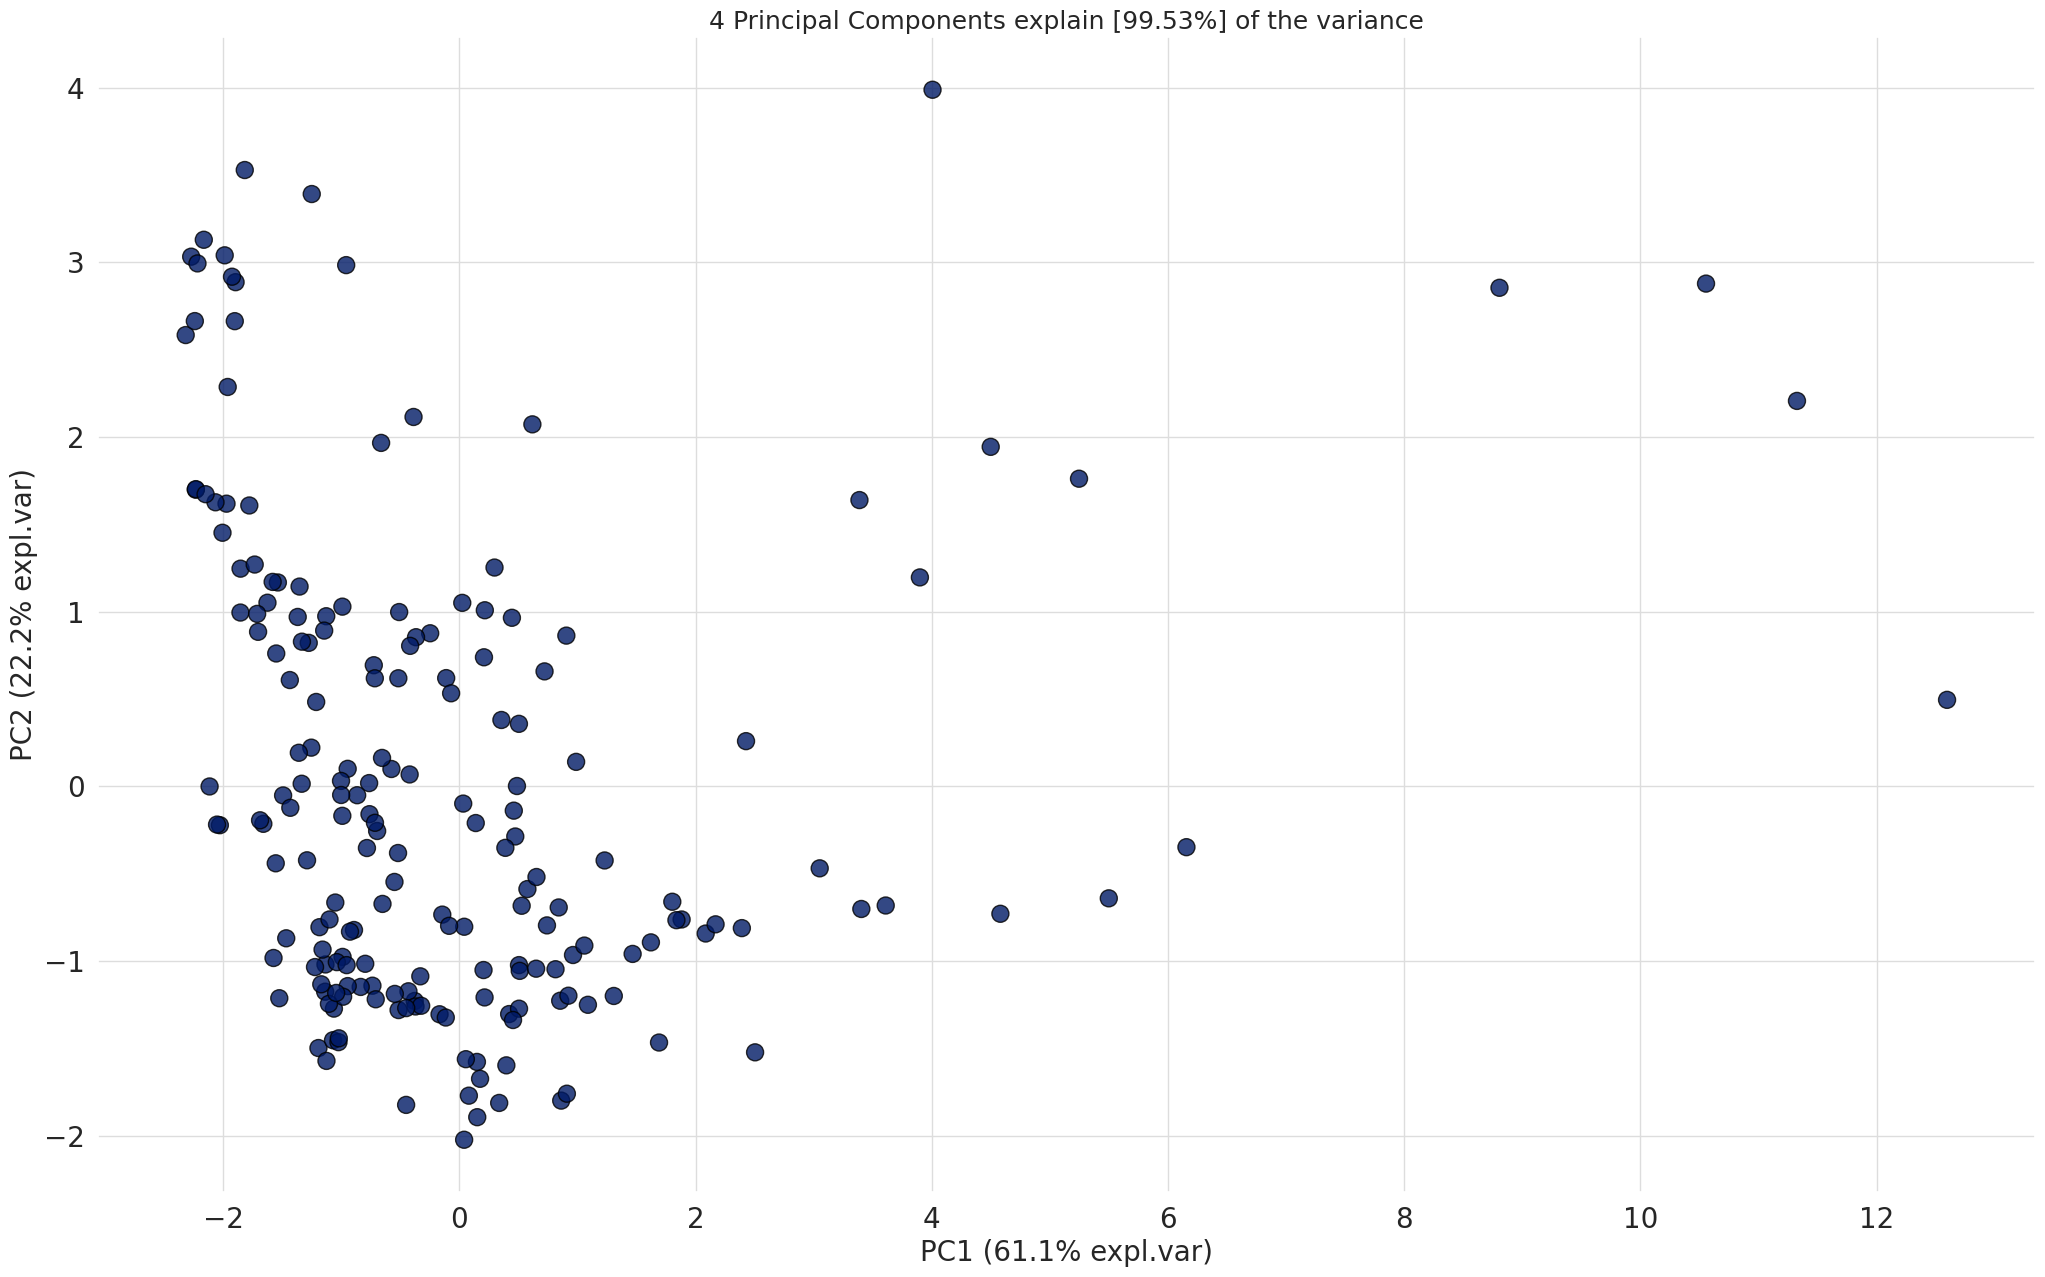

In [36]:
model.scatter(label=True, legend=False)

Eigenvectors

In [37]:
A = out['loadings'].T
A

PC1       PC2       PC3       PC4
MDVP:Fo(Hz)      -0.098262  0.667771 -0.052621 -0.680057
MDVP:Fhi(Hz)      0.028790  0.450427  0.811317  0.370716
MDVP:Flo(Hz)     -0.095567  0.551796 -0.575057  0.594569
MDVP:Jitter(%)    0.448658  0.072223 -0.017305 -0.052482
MDVP:Jitter(Abs)  0.436606 -0.120623 -0.020543  0.172887
MDVP:RAP          0.445236  0.099595 -0.049134 -0.083462
MDVP:PPQ          0.438170  0.084347 -0.052445  0.003831
Jitter:DDP        0.445236  0.099591 -0.049178 -0.083395

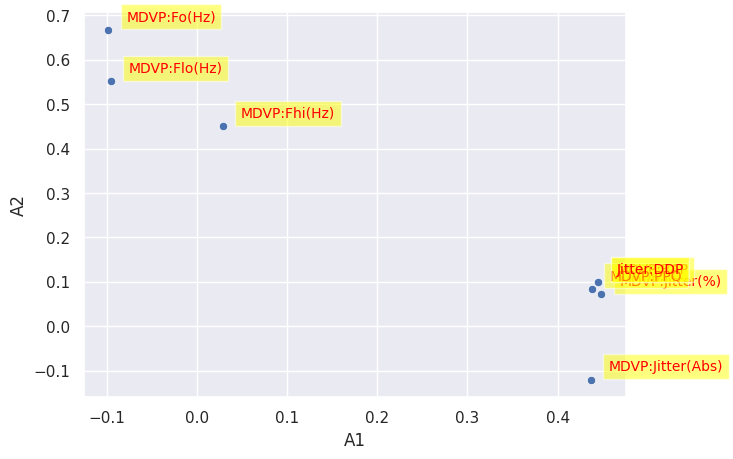

In [38]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('A1')
plt.ylabel('A2')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

Scree Plot

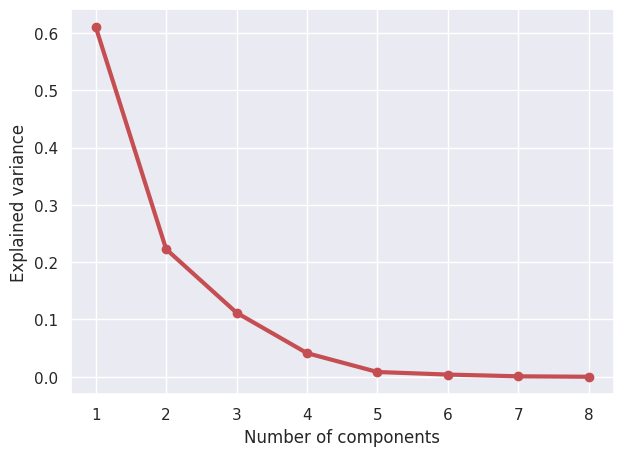

In [39]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show()

Explained Variance Plot

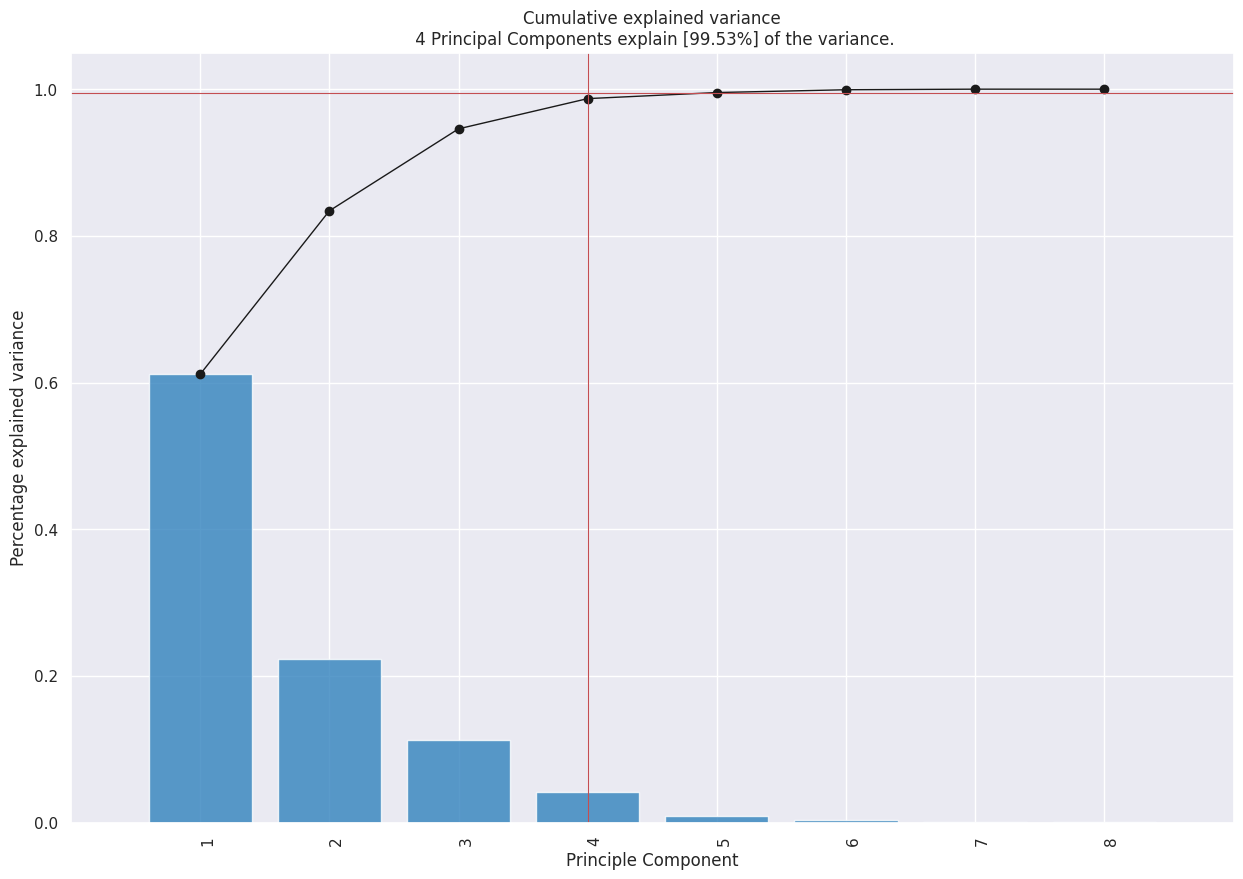

In [40]:
model.plot();

Biplot

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '4 Principal Components explain [99.53%] of the variance'}, xlabel='PC1 (61.1% expl.var)', ylabel='PC2 (22.2% expl.var)'>)

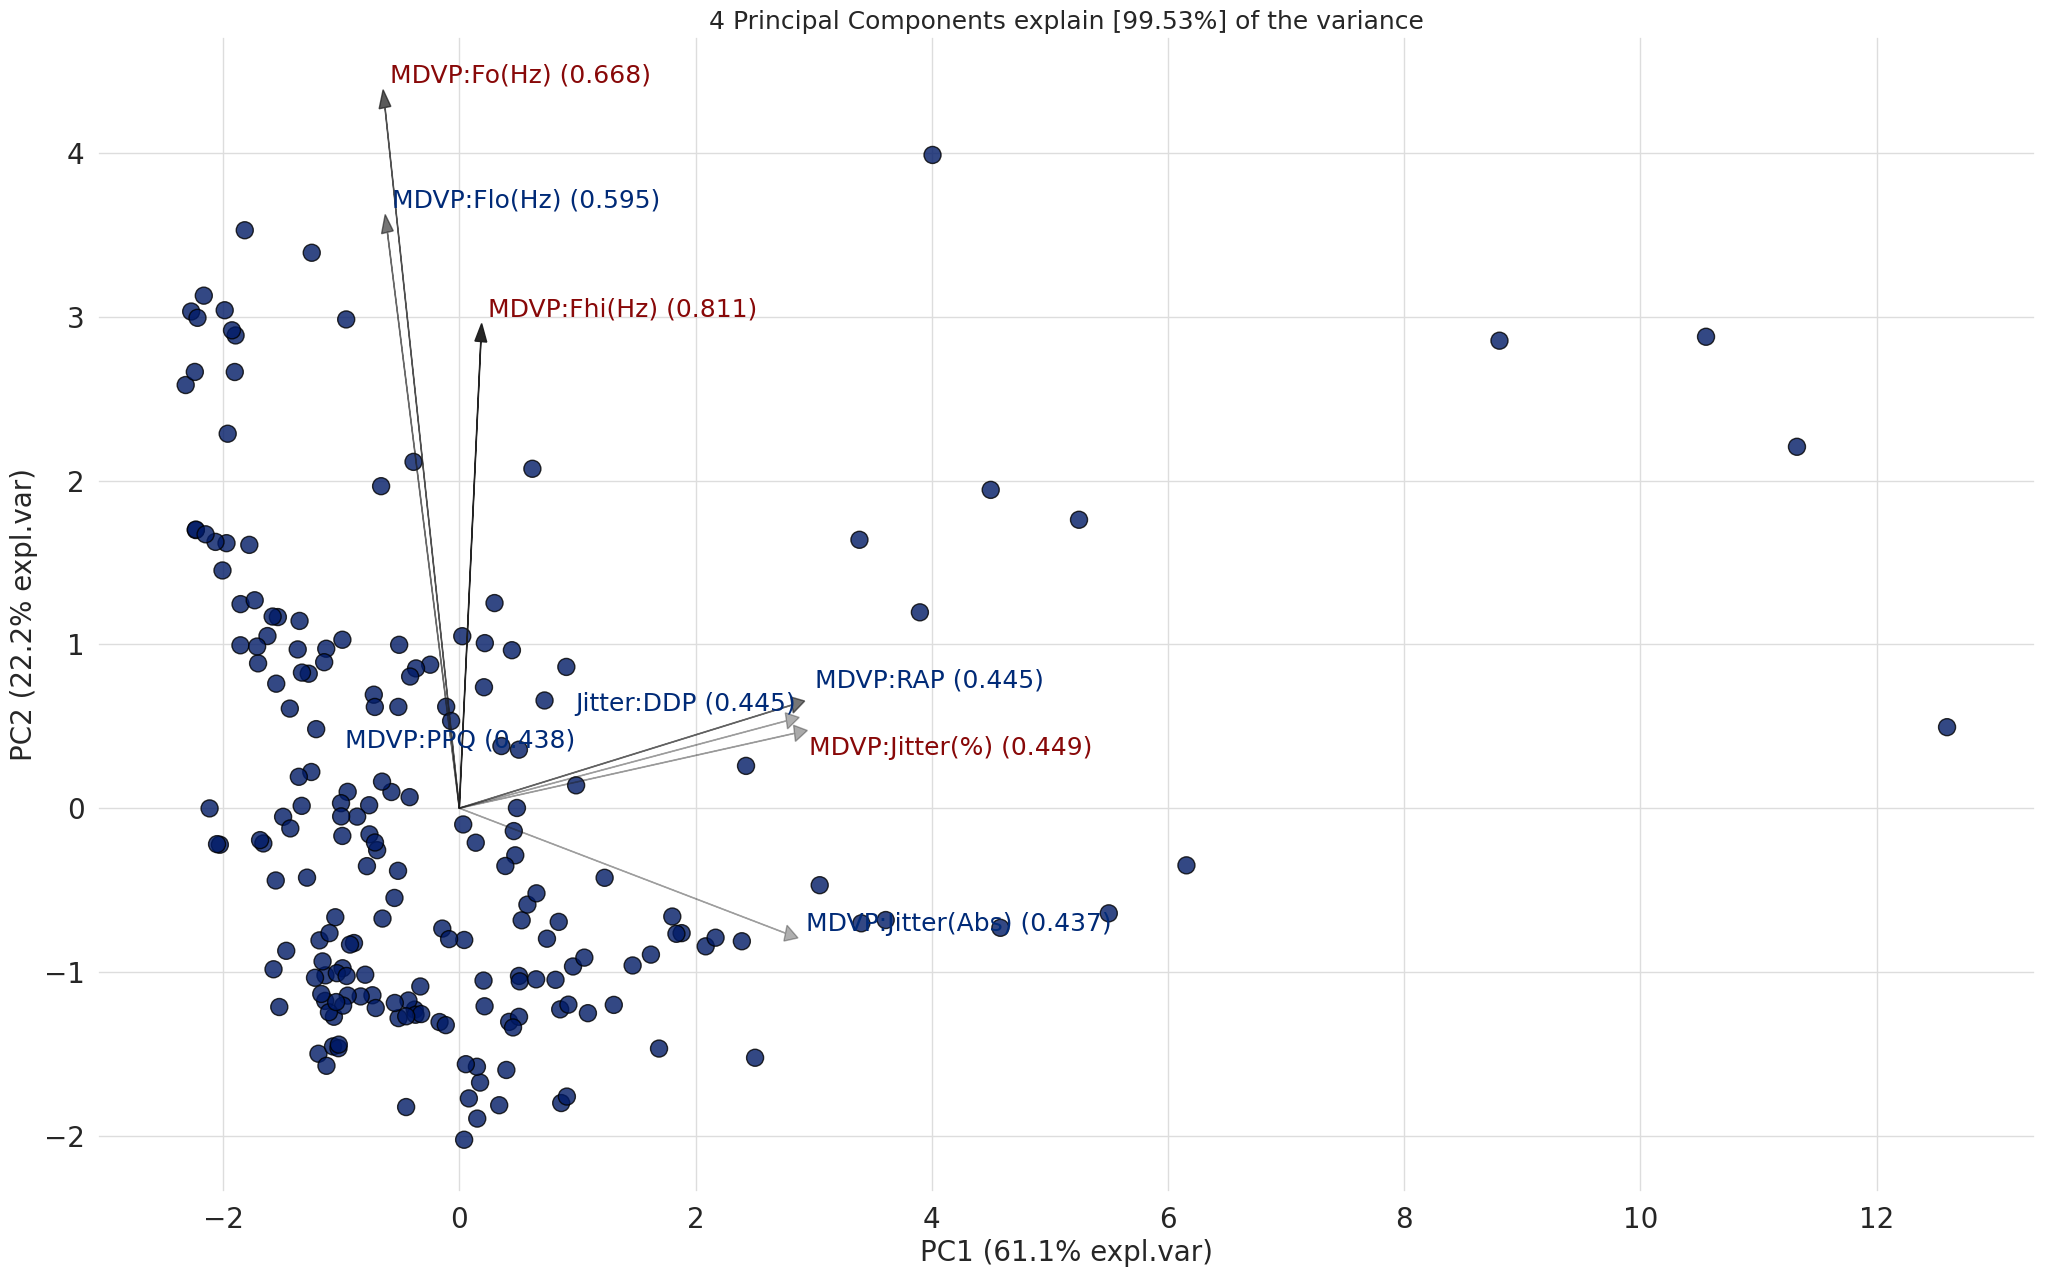

In [41]:
model.biplot(label=False, legend=False, color_arrow='k')

[scatterd] >INFO> Create scatterplot


[pca] >Plot PC1 vs PC2 vs PC3 with loadings.


(<Figure size 3000x2500 with 1 Axes>,
 <Axes3D: title={'center': '4 Principal Components explain [99.53%] of the variance'}, xlabel='PC1 (61.1% expl.var)', ylabel='PC2 (22.2% expl.var)', zlabel='PC3 (11.1% expl.var)'>)

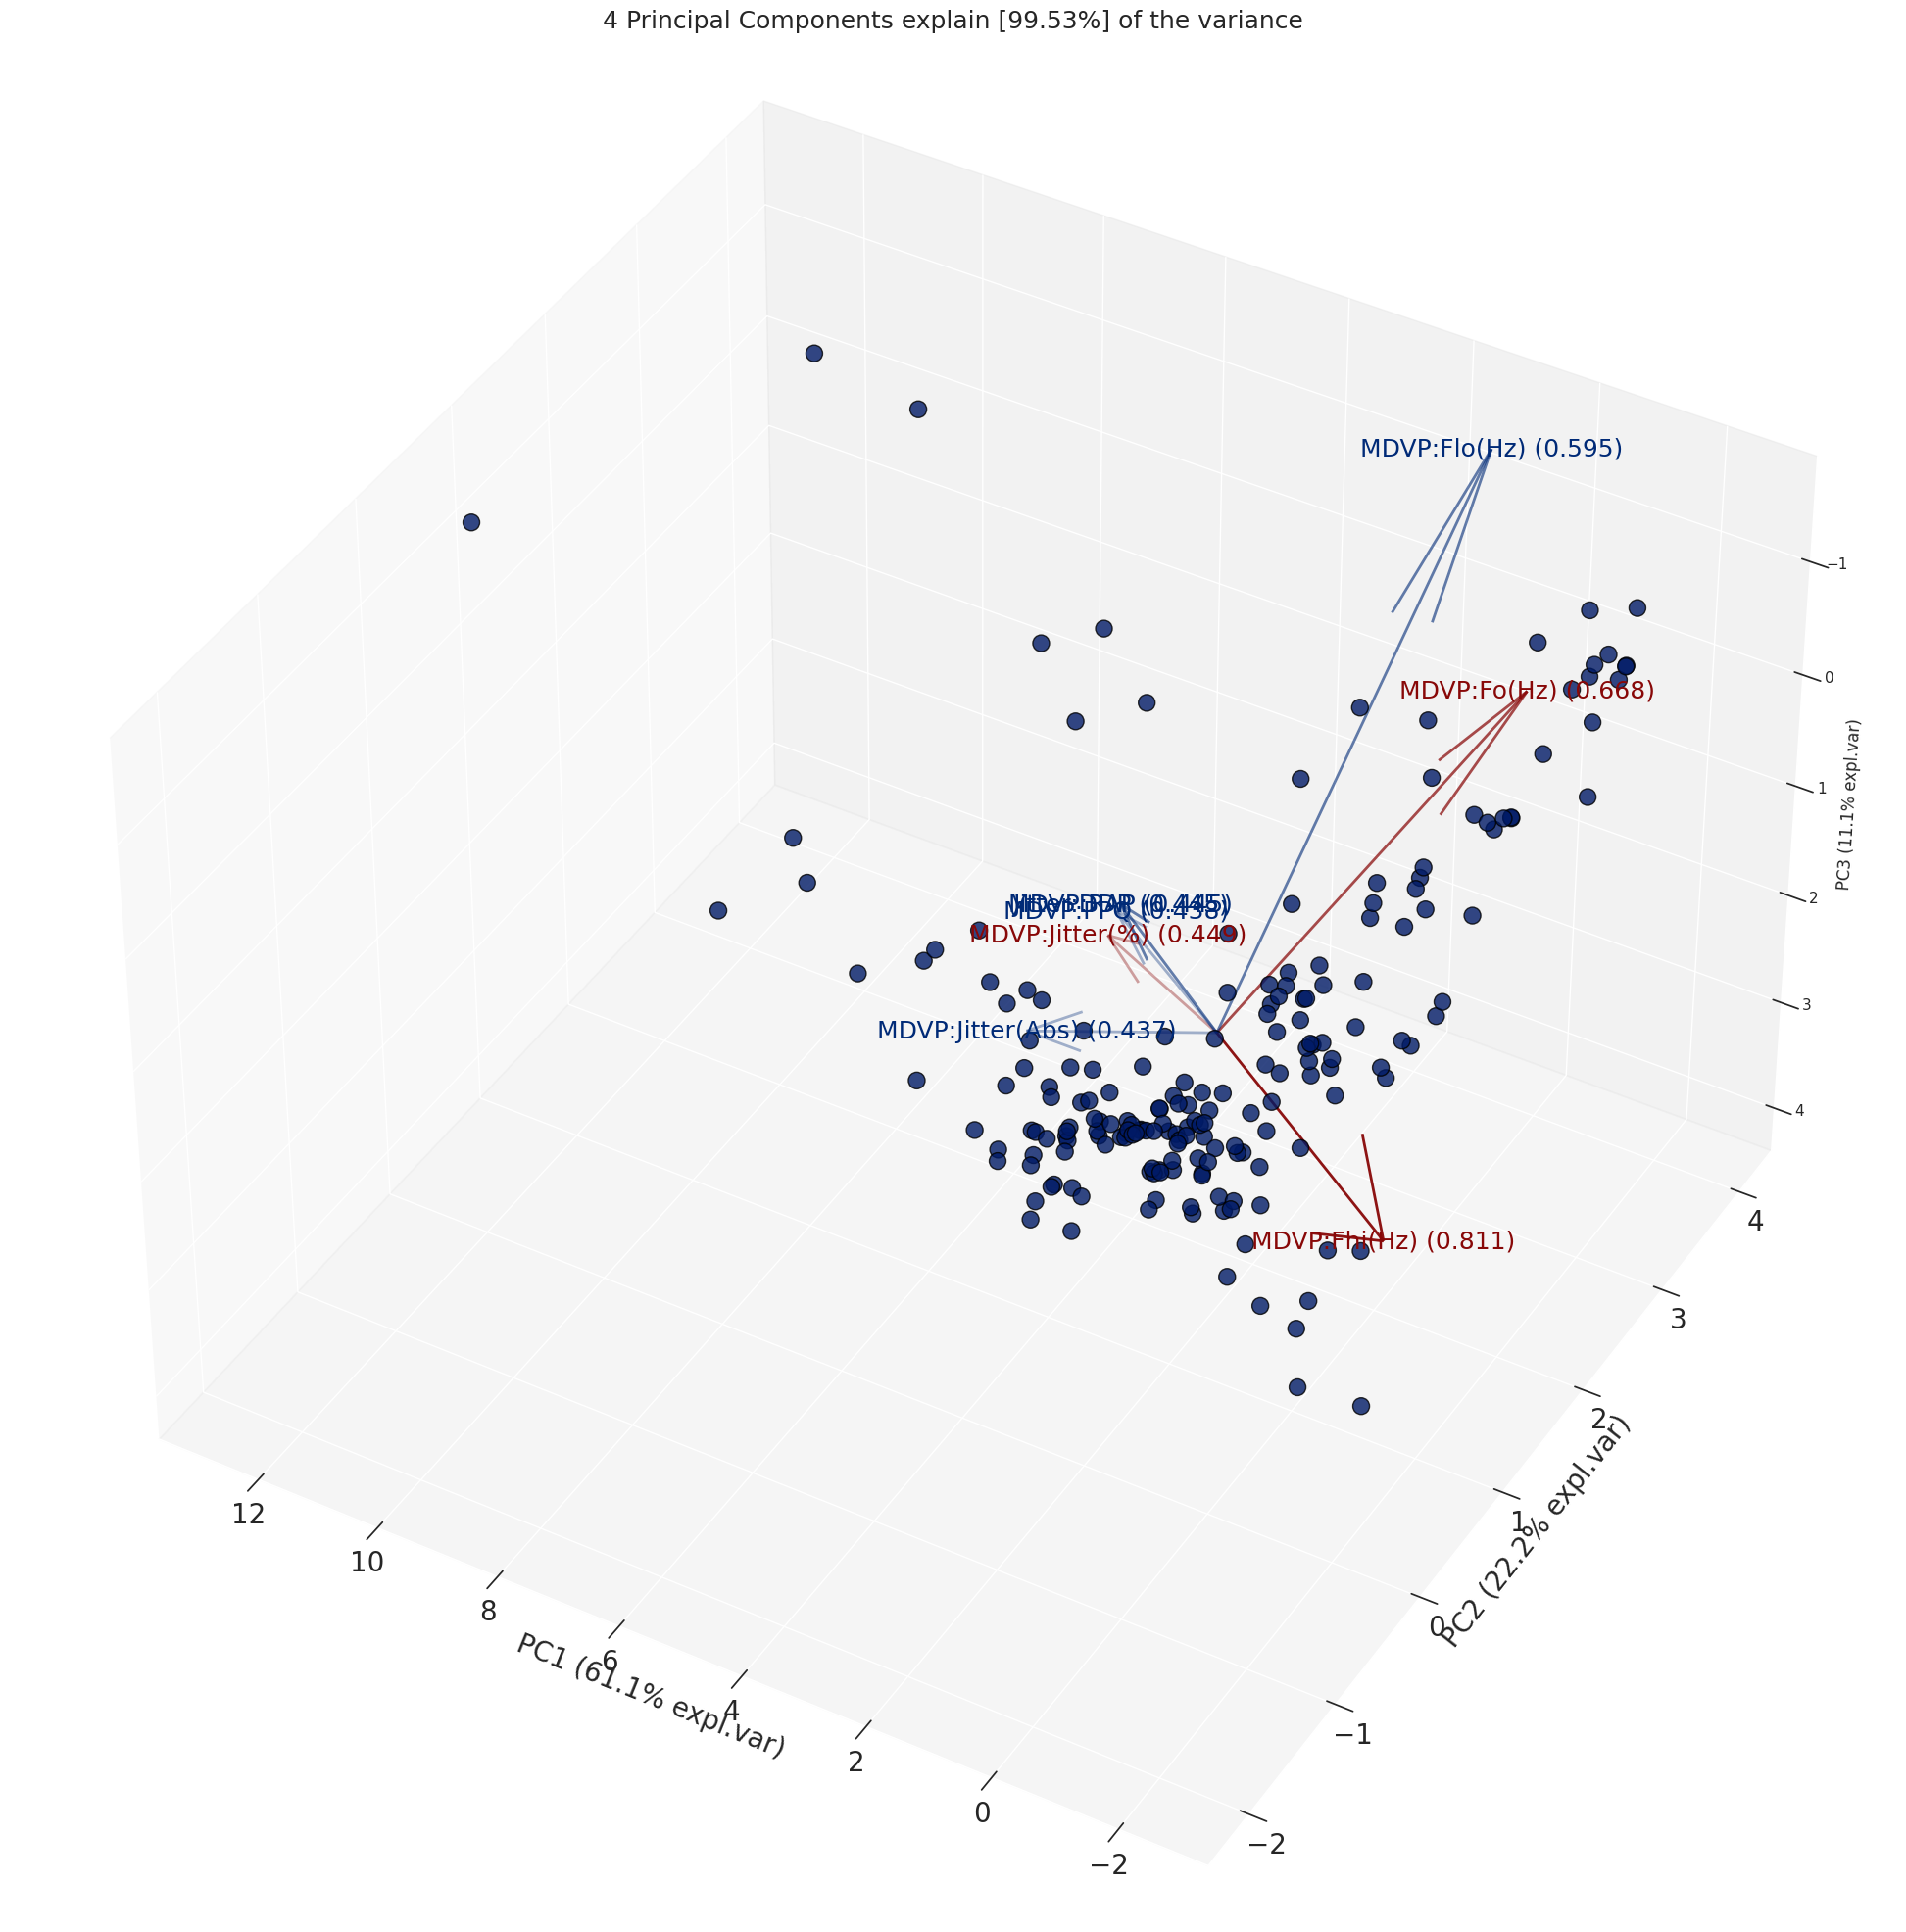

In [42]:
model.biplot3d(legend=False)

Classification using Pycaret

In [43]:
from pycaret.utils import version
version()

'3.0.0'

In [44]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)
#dr = df.drop(columns=['id'])

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (176, 9)
Unseen Data For Predictions: (19, 9)


In [46]:
from pycaret.classification import *
clf = setup(data=data, target='status', train_size=0.7, session_id=123)

Comparing Models

In [47]:
best_model = compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [48]:
best_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)

Logistic Regression

In [49]:
lr = create_model('lr')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Tuned Model

In [50]:
tuned_lr=tune_model(lr)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [51]:
tuned_lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Evaluate Logistic Regression

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

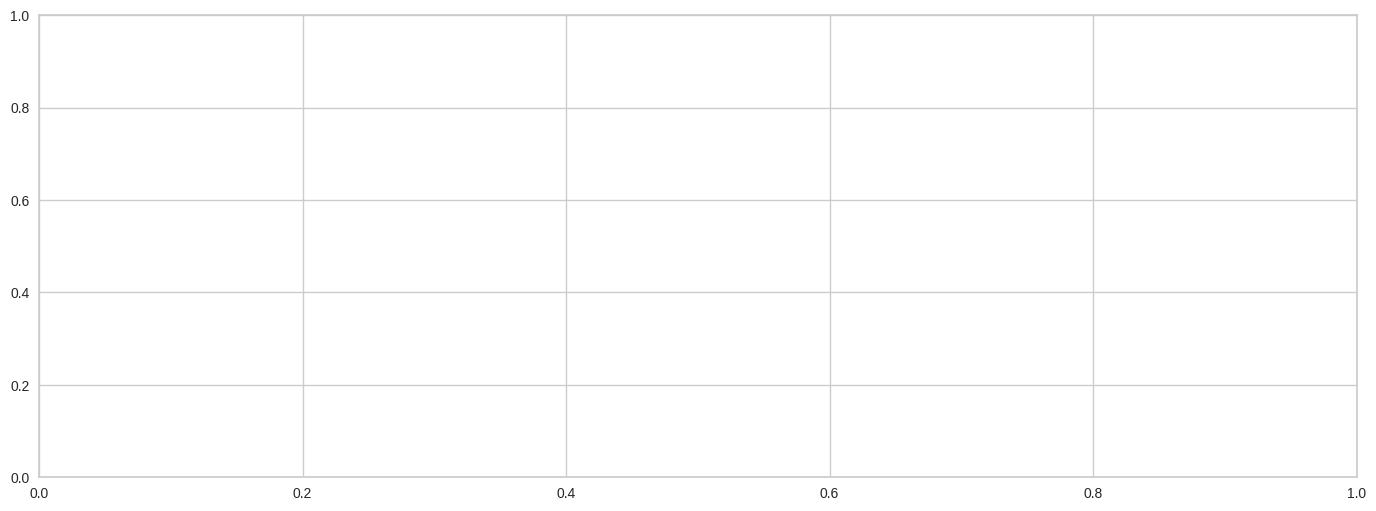

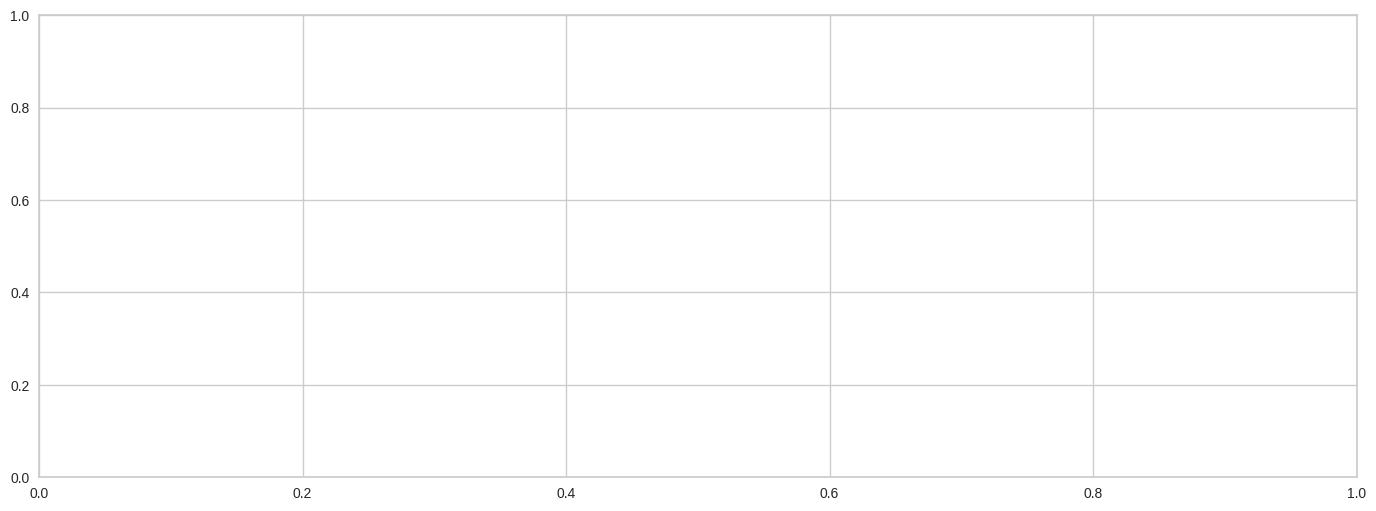

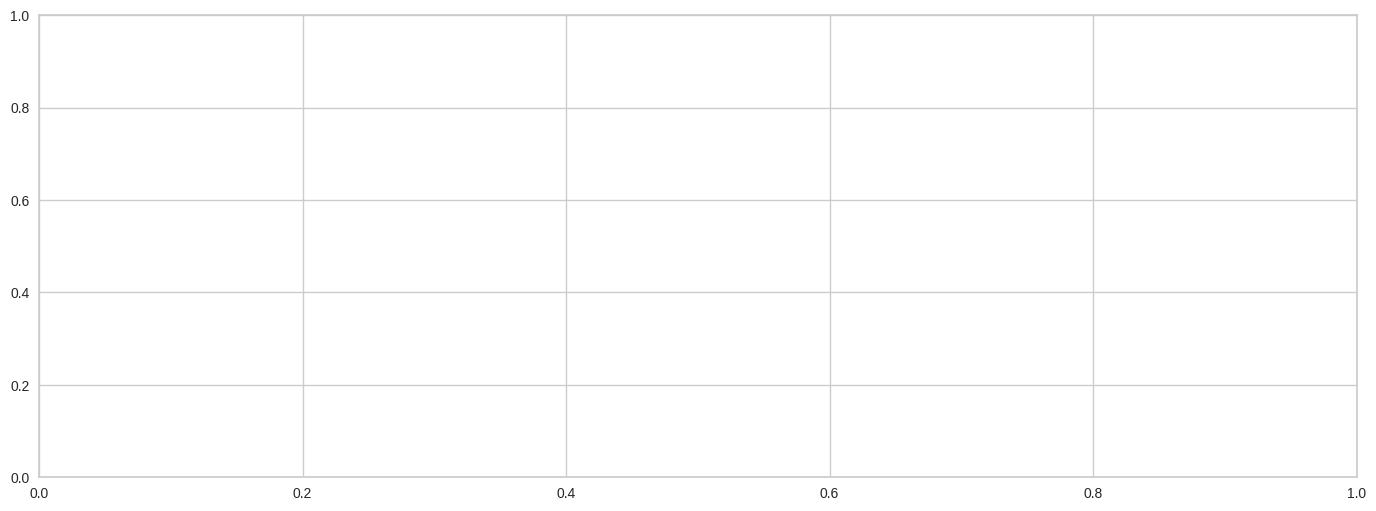

In [54]:
evaluate_model(tuned_lr)

Create Model with K-Nearest Neighbour

In [55]:
knn = create_model('knn')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Tune model with K-nearest neighbour

In [56]:
tuned_knn = tune_model(knn)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [58]:
tuned_knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=-1, n_neighbors=13, p=2,
                     weights='distance')

Evaluate model with K-nearest neighbour

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

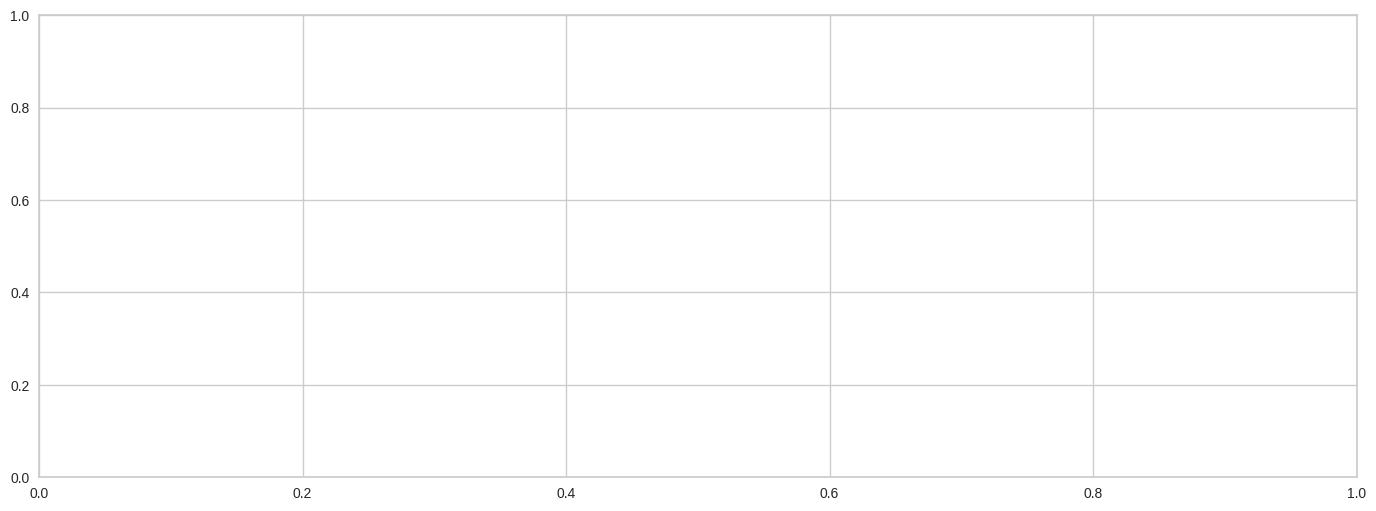

In [59]:
evaluate_model(tuned_knn)

Create model with Quadratic Discriminant Analysis

In [60]:
qda=create_model('qda')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Tune QDA Model

In [61]:
tuned_qda=tune_model(qda)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [62]:
tuned_qda

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

Evaluate QDA Model

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

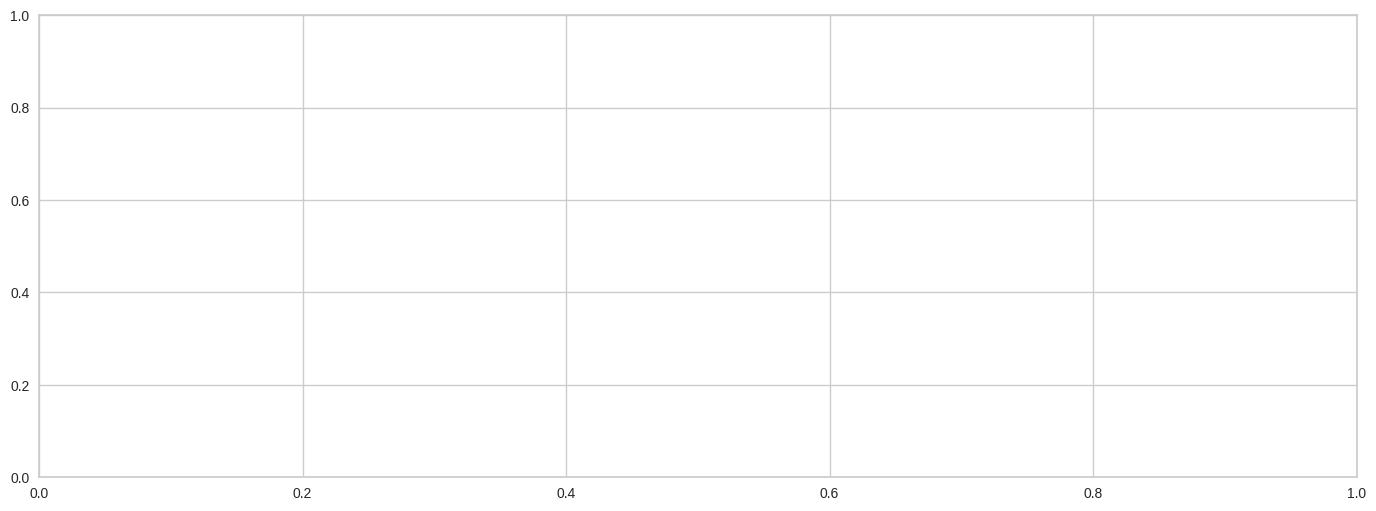

In [63]:
evaluate_model(tuned_qda)

Classification + PCA

In [64]:
!pip install statsmodels --upgrade

In [66]:
clf_pca = setup(data=data, target='status', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)

Comparing Models

In [67]:
best_model_pca = compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

Best model with PCA

In [68]:
best_model_pca

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

Tune Best Model

In [69]:
tuned_best_model_pca = tune_model(best_model_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Evaluate Best Model

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

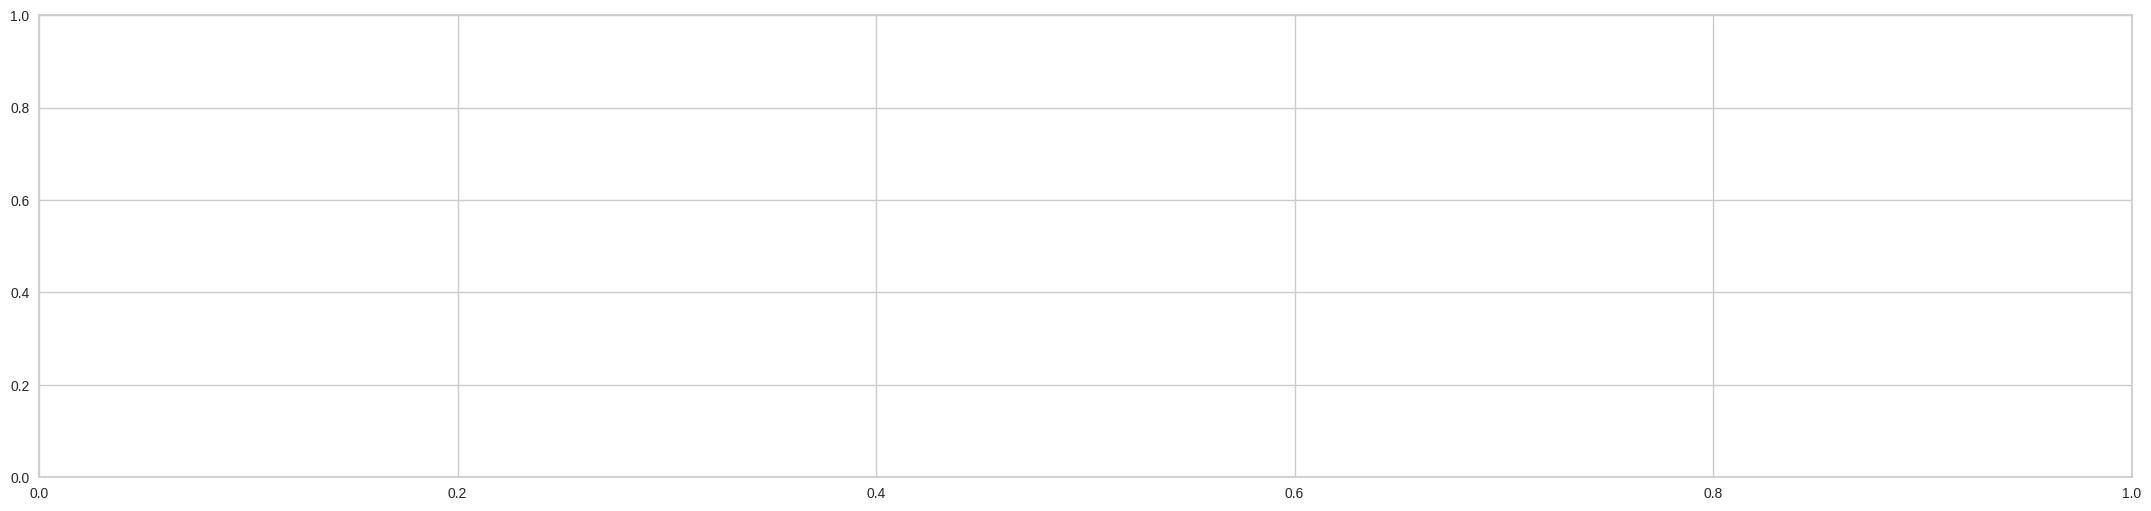

In [70]:
evaluate_model(tuned_best_model_pca)

In [71]:
lr_pca = create_model('lr')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [72]:
tuned_lr_pca = tune_model(lr_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [73]:
tuned_lr_pca

LogisticRegression(C=0.056, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

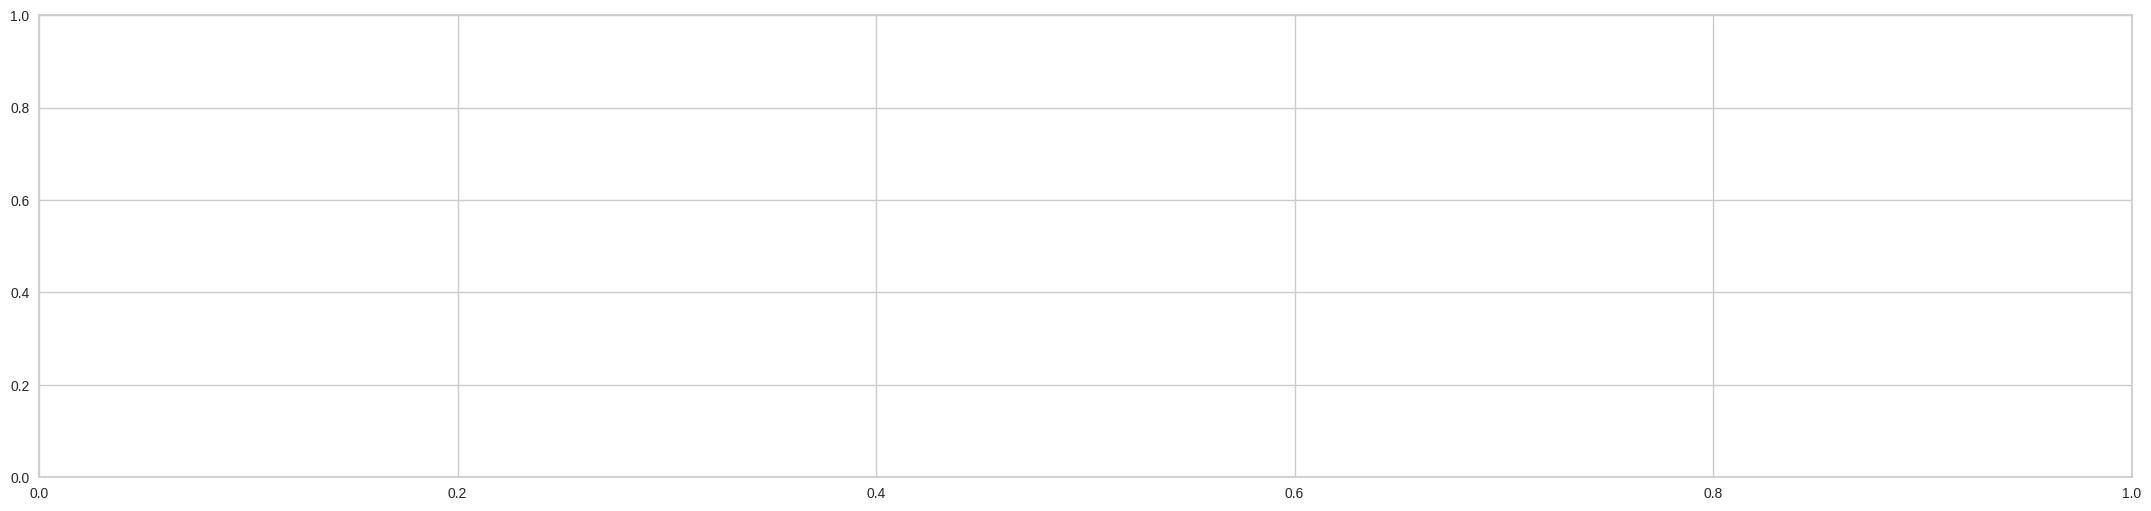

In [74]:
evaluate_model(tuned_lr_pca)

In [75]:
knn_pca = create_model('knn')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [76]:
tuned_knn_pca = tune_model(knn_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [77]:
tuned_knn_pca

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=9, p=2,
                     weights='distance')

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

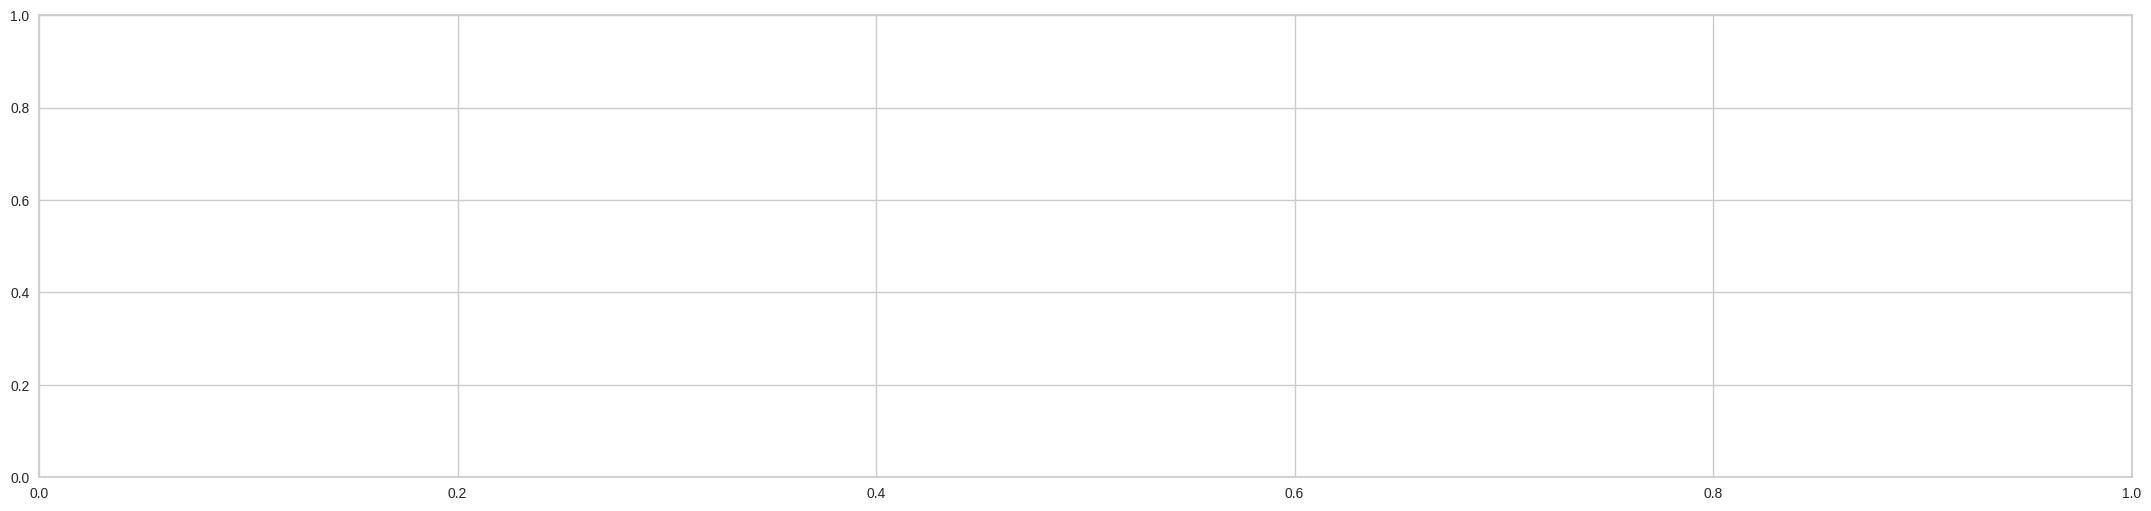

In [78]:
evaluate_model(tuned_knn_pca)

In [79]:
qda_pca = create_model('qda')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [80]:
tuned_qda_pca = tune_model(qda_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [81]:
tuned_qda_pca

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.57,
                              store_covariance=False, tol=0.0001)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

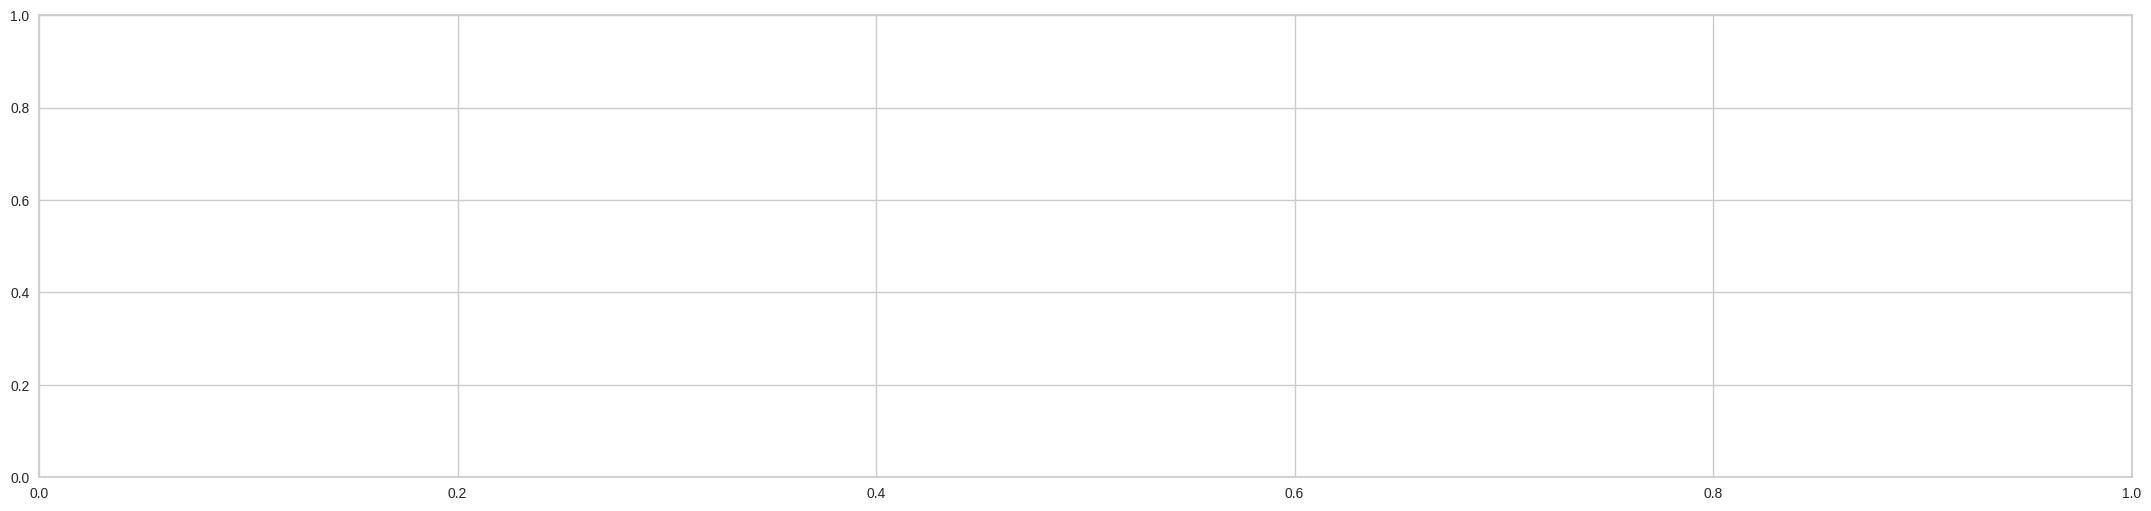

In [82]:
evaluate_model(tuned_qda_pca)

In [83]:
et_pca = create_model('et')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [84]:
tuned_et_pca = tune_model(et_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [85]:
tuned_et_pca

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

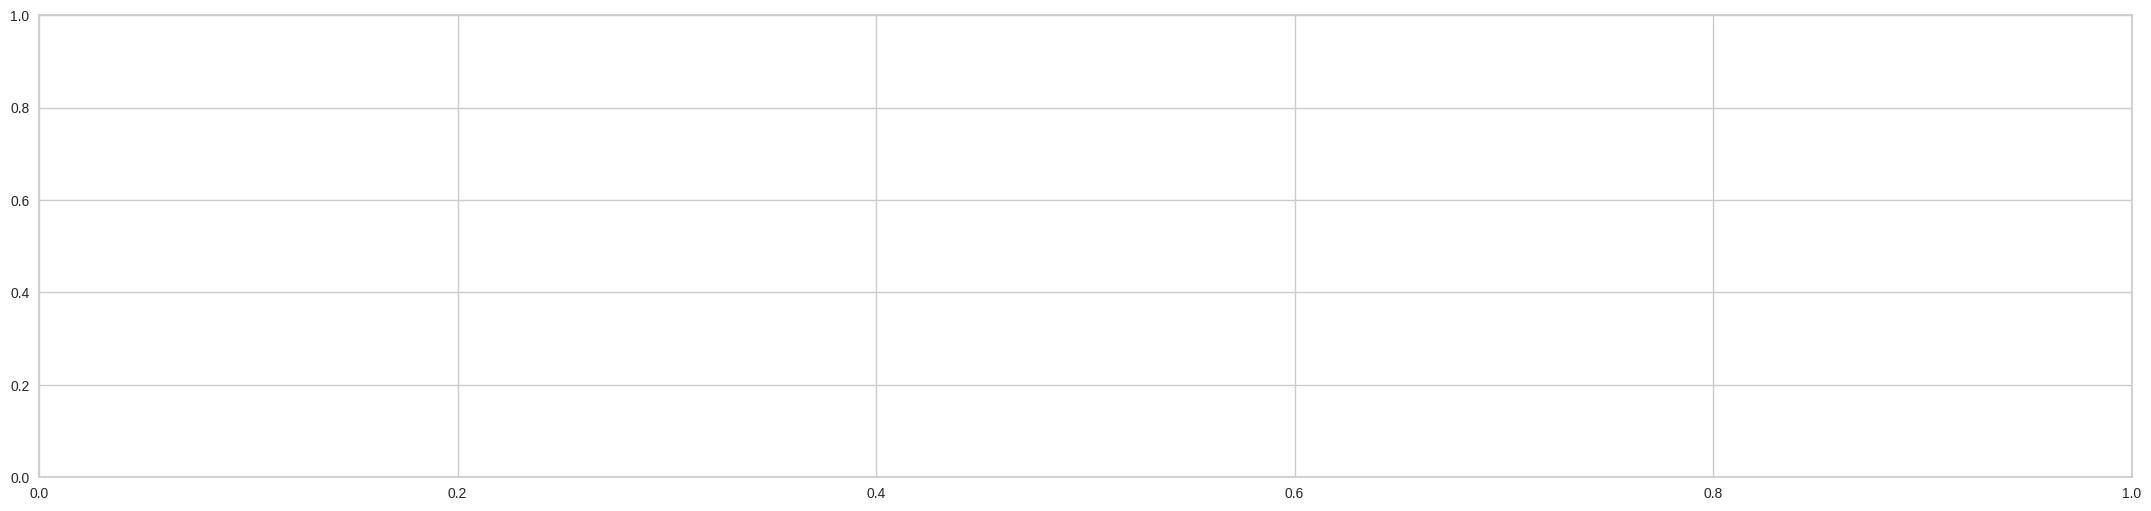

In [86]:
evaluate_model(tuned_et_pca)